In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', parse_dates={'DateTime': ['Date', 'Time']}, dayfirst=False)

In [3]:
data = data.rename(columns={
        'Descript': 'Description',
        'Y': 'Lat',
        'X': 'Lon',
        'IncidntNum': 'IncidentId',
    })
data = data.set_index(['IncidentId', 'PdId'])
data = data[['DateTime', 'Category', 'Description', 'Resolution', 'Lat', 'Lon', 'Address', 'PdDistrict']]
data = data.sort_values(by='DateTime')
data.head()

DateTime        Category  \
IncidentId PdId                                                 
141017556  14101755671000 2014-06-01 00:01:00    NON-CRIMINAL   
150091383  15009138327195 2014-06-01 00:01:00        TRESPASS   
           15009138364070 2014-06-01 00:01:00  SUSPICIOUS OCC   
150099149  15009914906303 2014-06-01 00:01:00   LARCENY/THEFT   
140605461  14060546109027 2014-06-01 00:01:00  OTHER OFFENSES   

                                           Description Resolution        Lat  \
IncidentId PdId                                                                
141017556  14101755671000                LOST PROPERTY       NONE  37.783553   
150091383  15009138327195                  TRESPASSING       NONE  37.735578   
           15009138364070        SUSPICIOUS OCCURRENCE       NONE  37.735578   
150099149  15009914906303  PETTY THEFT FROM A BUILDING       NONE  37.719624   
140605461  14060546109027            FALSE PERSONATION       NONE  37.782951   

                                  Lon                      Address  PdDistrict  
IncidentId PdId                                                                 
141017556  14101755671000 -122.417645       600 Block of LARKIN ST    NORTHERN  
150091383  15009138327195 -122.452915  300 Block of CRESTAVISTA DR   INGLESIDE  
           15009138364070 -122.452915  300 Block of CRESTAVISTA DR   INGLESIDE  
150099149  15009914906303 -122.435324       500 Block of LISBON ST   INGLESIDE  
140605461  14060546109027 -122.413259         200 Block of TURK ST  TENDERLOIN

In [4]:
len(data)

28993

In [5]:
data[data.Category == 'NON-CRIMINAL'].Description.value_counts()

LOST PROPERTY                           1202
FOUND PROPERTY                           757
CASE CLOSURE                             263
AIDED CASE                               243
AIDED CASE -PROPERTY FOR DESTRUCTION     177
SEARCH WARRANT SERVICE                   106
COURTESY REPORT                           82
FIRE REPORT                               53
PROPERTY FOR IDENTIFICATION               38
TARASOFF REPORT                           25
TURNED IN GUN                             23
LOCATED PROPERTY                          20
TRAFFIC ACCIDENT                          16
SHELTER                                   12
MISPLACED VEHICLE                          2
IMPOUNDED VEHICLE                          2
ACCIDENTAL BURNS                           1
AUTO IMPOUNDED                             1
Name: Description, dtype: int64

In [6]:
print(data.Description.value_counts().to_string())

GRAND THEFT FROM LOCKED AUTO                                   3766
STOLEN AUTOMOBILE                                              1350
LOST PROPERTY                                                  1202
PETTY THEFT OF PROPERTY                                        1125
WARRANT ARREST                                                  980
PETTY THEFT FROM LOCKED AUTO                                    955
BATTERY                                                         903
FOUND PROPERTY                                                  757
GRAND THEFT FROM UNLOCKED AUTO                                  681
SUSPICIOUS OCCURRENCE                                           677
FOUND PERSON                                                    637
INVESTIGATIVE DETENTION                                         559
GRAND THEFT OF PROPERTY                                         485
THREATS AGAINST LIFE                                            473
ENROUTE TO OUTSIDE JURISDICTION                 

In [7]:
data.Category.value_counts()

LARCENY/THEFT                  9466
OTHER OFFENSES                 3567
NON-CRIMINAL                   3023
ASSAULT                        2882
VEHICLE THEFT                  1966
WARRANTS                       1782
DRUG/NARCOTIC                  1345
SUSPICIOUS OCC                 1300
MISSING PERSON                 1266
SECONDARY CODES                 442
WEAPON LAWS                     354
ROBBERY                         308
TRESPASS                        281
FRAUD                           242
DRUNKENNESS                     147
KIDNAPPING                      117
PROSTITUTION                    112
DRIVING UNDER THE INFLUENCE     100
ARSON                            63
RUNAWAY                          61
LIQUOR LAWS                      42
DISORDERLY CONDUCT               31
FORGERY/COUNTERFEITING           18
VANDALISM                        17
SUICIDE                          14
EMBEZZLEMENT                     10
FAMILY OFFENSES                  10
STOLEN PROPERTY             

In [8]:
data.Resolution.value_counts()

NONE                                      19139
ARREST, BOOKED                             6502
ARREST, CITED                              1419
LOCATED                                    1042
UNFOUNDED                                   260
JUVENILE BOOKED                             163
PSYCHOPATHIC CASE                           114
JUVENILE CITED                               91
COMPLAINANT REFUSES TO PROSECUTE             66
EXCEPTIONAL CLEARANCE                        56
PROSECUTED BY OUTSIDE AGENCY                 40
DISTRICT ATTORNEY REFUSES TO PROSECUTE       33
NOT PROSECUTED                               28
JUVENILE ADMONISHED                          24
JUVENILE DIVERTED                             8
CLEARED-CONTACT JUVENILE FOR MORE INFO        8
Name: Resolution, dtype: int64

In [9]:
print(data.Resolution.groupby(data.Category).value_counts().to_string())

Category                     Resolution                            
ARSON                        NONE                                        43
                             ARREST, BOOKED                              18
                             EXCEPTIONAL CLEARANCE                        1
                             JUVENILE ADMONISHED                          1
ASSAULT                      NONE                                      1707
                             ARREST, BOOKED                             898
                             ARREST, CITED                              171
                             COMPLAINANT REFUSES TO PROSECUTE            29
                             JUVENILE BOOKED                             24
                             JUVENILE CITED                              14
                             PSYCHOPATHIC CASE                           13
                             EXCEPTIONAL CLEARANCE                       10
                    

In [10]:
print(data.Category.groupby(data.Resolution).value_counts().to_string())

Resolution                              Category                   
ARREST, BOOKED                          WARRANTS                       1609
                                        OTHER OFFENSES                 1394
                                        DRUG/NARCOTIC                  1110
                                        ASSAULT                         898
                                        LARCENY/THEFT                   291
                                        WEAPON LAWS                     220
                                        NON-CRIMINAL                    141
                                        SECONDARY CODES                 126
                                        DRUNKENNESS                     103
                                        DRIVING UNDER THE INFLUENCE      84
                                        VEHICLE THEFT                    84
                                        TRESPASS                         73
                    

In [11]:
sns.lmplot(x='Lat', y='Lon', data=data, fit_reg=False, hue='Category')

In [12]:
data['Month'] = data.DateTime.map(lambda x: x.month)
data['Day'] = data.DateTime.map(lambda x: x.day)
data['Hour'] = data.DateTime.map(lambda x: x.hour)
data['Weekday'] = data.DateTime.map(lambda x: x.weekday())

In [13]:
sns.lmplot(x='Lat', y='Lon', data=data.sample(n=5000), fit_reg=False, hue='Month')

In [14]:
sns.lmplot(x='Lat', y='Lon', data=data[data.Description == 'LOST PROPERTY'], fit_reg=False)

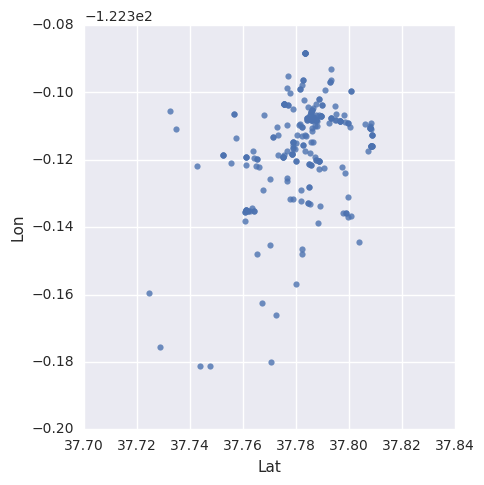

In [15]:
sns.lmplot(x='Lat', y='Lon', data=data[data.Description == 'GRAND THEFT PICKPOCKET'], fit_reg=False)

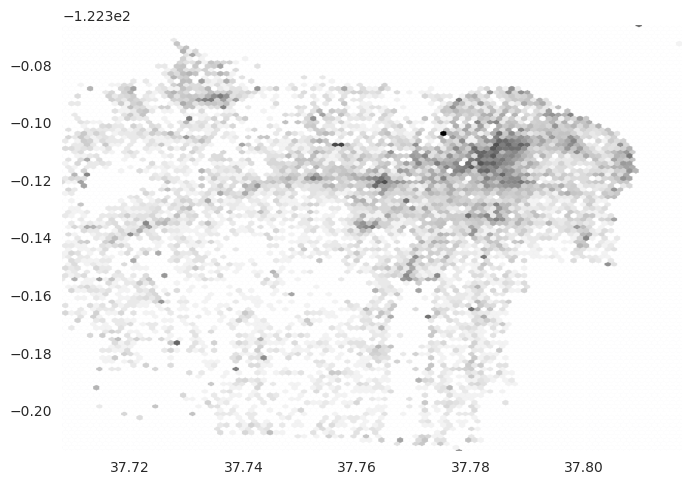

In [16]:
plt.hexbin(x='Lat', y='Lon', data=data, bins='log')

In [17]:
data

DateTime                     Category  \
IncidentId PdId                                                              
141017556  14101755671000 2014-06-01 00:01:00                 NON-CRIMINAL   
150091383  15009138327195 2014-06-01 00:01:00                     TRESPASS   
           15009138364070 2014-06-01 00:01:00               SUSPICIOUS OCC   
150099149  15009914906303 2014-06-01 00:01:00                LARCENY/THEFT   
140605461  14060546109027 2014-06-01 00:01:00               OTHER OFFENSES   
140626865  14062686506381 2014-06-01 00:01:00                LARCENY/THEFT   
           14062686506125 2014-06-01 00:01:00                LARCENY/THEFT   
140691733  14069173309029 2014-06-01 00:01:00               OTHER OFFENSES   
140457331  14045733109250 2014-06-01 00:01:00                        FRAUD   
140908839  14090883906313 2014-06-01 00:01:00                LARCENY/THEFT   
146106938  14610693806244 2014-06-01 00:01:00                LARCENY/THEFT   
140908839  14090883906303 2014-06-01 00:01:00                LARCENY/THEFT   
140779301  14077930119057 2014-06-01 00:01:00                      ASSAULT   
140763495  14076349571000 2014-06-01 00:01:00                 NON-CRIMINAL   
140801415  14080141515161 2014-06-01 00:01:00               OTHER OFFENSES   
146107033  14610703306374 2014-06-01 00:01:00                LARCENY/THEFT   
146108495  14610849506244 2014-06-01 00:01:00                LARCENY/THEFT   
141085064  14108506409029 2014-06-01 00:01:00               OTHER OFFENSES   
140456032  14045603227195 2014-06-01 00:10:00                     TRESPASS   
140636701  14063670109027 2014-06-01 00:10:00               OTHER OFFENSES   
140455705  14045570563010 2014-06-01 00:25:00                     WARRANTS   
           14045570562050 2014-06-01 00:25:00                     WARRANTS   
140455711  14045571106126 2014-06-01 00:28:00                LARCENY/THEFT   
           14045571106125 2014-06-01 00:28:00                LARCENY/THEFT   
146105554  14610555406372 2014-06-01 00:30:00                LARCENY/THEFT   
146105504  14610550406372 2014-06-01 00:30:00                LARCENY/THEFT   
146105065  14610506506244 2014-06-01 00:40:00                LARCENY/THEFT   
146105009  14610500971000 2014-06-01 00:54:00                 NON-CRIMINAL   
146114903  14611490306244 2014-06-01 01:00:00                LARCENY/THEFT   
146110064  14611006471000 2014-06-01 01:00:00                 NON-CRIMINAL   
...                                       ...                          ...   
140736624  14073662407021 2014-08-31 22:00:00                VEHICLE THEFT   
140734010  14073401004081 2014-08-31 22:01:00                      ASSAULT   
           14073401012080 2014-08-31 22:01:00                  WEAPON LAWS   
           14073401028010 2014-08-31 22:01:00               OTHER OFFENSES   
140734151  14073415168020 2014-08-31 22:10:00               OTHER OFFENSES   
146179355  14617935506224 2014-08-31 22:18:00                LARCENY/THEFT   
146178476  14617847606244 2014-08-31 22:30:00                LARCENY/THEFT   
140734822  14073482206241 2014-08-31 22:30:00                LARCENY/THEFT   
140734123  14073412319057 2014-08-31 22:35:00                      ASSAULT   
           14073412315200 2014-08-31 22:35:00              SECONDARY CODES   
140734098  14073409872000 2014-08-31 22:38:00                 NON-CRIMINAL   
           14073409864070 2014-08-31 22:38:00               SUSPICIOUS OCC   
140734214  14073421404014 2014-08-31 22:51:00                      ASSAULT   
           14073421427010 2014-08-31 22:51:00                        FRAUD   
140734145  14073414504134 2014-08-31 22:58:00                      ASSAULT   
140738147  14073814727175 2014-08-31 23:00:00               OTHER OFFENSES   
140734258  14073425827195 2014-08-31 23:00:00                     TRESPASS   
140738711  14073871107025 2014-08-31 23:00:00                VEHICLE THEFT   
140787570  14078757071000 2014-08-31 23:00:00              

In [18]:
data[data.Description.map(lambda x: bool(re.search(r'\b(auto|car|vehicle)s?\b', x, re.IGNORECASE)))]

DateTime        Category  \
IncidentId PdId                                                 
146106938  14610693806244 2014-06-01 00:01:00   LARCENY/THEFT   
146108495  14610849506244 2014-06-01 00:01:00   LARCENY/THEFT   
146105065  14610506506244 2014-06-01 00:40:00   LARCENY/THEFT   
146114903  14611490306244 2014-06-01 01:00:00   LARCENY/THEFT   
146114107  14611410706244 2014-06-01 01:40:00   LARCENY/THEFT   
140455749  14045574965055 2014-06-01 01:44:00  OTHER OFFENSES   
146104738  14610473806244 2014-06-01 02:05:00   LARCENY/THEFT   
140508536  14050853606243 2014-06-01 03:00:00   LARCENY/THEFT   
140455896  14045589626031 2014-06-01 04:45:00           ARSON   
146106405  14610640506244 2014-06-01 11:10:00   LARCENY/THEFT   
140456333  14045633306244 2014-06-01 12:00:00   LARCENY/THEFT   
140463322  14046332206243 2014-06-01 12:20:00   LARCENY/THEFT   
146106988  14610698806244 2014-06-01 13:00:00   LARCENY/THEFT   
146109089  14610908906224 2014-06-01 13:35:00   LARCENY/THEFT   
146104976  14610497606244 2014-06-01 15:00:00   LARCENY/THEFT   
146105598  14610559806244 2014-06-01 16:00:00   LARCENY/THEFT   
140456963  14045696306244 2014-06-01 16:00:00   LARCENY/THEFT   
140457789  14045778906241 2014-06-01 16:00:00   LARCENY/THEFT   
140457397  14045739706244 2014-06-01 17:00:00   LARCENY/THEFT   
146108069  14610806906244 2014-06-01 17:00:00   LARCENY/THEFT   
146106994  14610699406244 2014-06-01 18:00:00   LARCENY/THEFT   
140459274  14045927407020 2014-06-01 18:00:00   VEHICLE THEFT   
140457353  14045735306244 2014-06-01 18:00:00   LARCENY/THEFT   
140457723  14045772306244 2014-06-01 18:30:00   LARCENY/THEFT   
146104299  14610429906224 2014-06-01 18:30:00   LARCENY/THEFT   
140457347  14045734704081 2014-06-01 19:33:00         ASSAULT   
140457585  14045758506244 2014-06-01 19:45:00   LARCENY/THEFT   
146105623  14610562306224 2014-06-01 20:00:00   LARCENY/THEFT   
146106530  14610653006244 2014-06-01 20:00:00   LARCENY/THEFT   
146103724  14610372406244 2014-06-01 20:00:00   LARCENY/THEFT   
...                                       ...             ...   
146177898  14617789806224 2014-08-31 19:45:00   LARCENY/THEFT   
146179076  14617907606244 2014-08-31 20:00:00   LARCENY/THEFT   
140733868  14073386806243 2014-08-31 20:00:00   LARCENY/THEFT   
146177359  14617735906244 2014-08-31 20:00:00   LARCENY/THEFT   
146185669  14618566906244 2014-08-31 20:00:00   LARCENY/THEFT   
140742245  14074224506242 2014-08-31 20:14:00   LARCENY/THEFT   
140734402  14073440206244 2014-08-31 20:15:00   LARCENY/THEFT   
146178943  14617894306244 2014-08-31 20:20:00   LARCENY/THEFT   
140733921  14073392106244 2014-08-31 20:20:00   LARCENY/THEFT   
140735187  14073518706244 2014-08-31 20:25:00   LARCENY/THEFT   
140734208  14073420806244 2014-08-31 20:25:00   LARCENY/THEFT   
140734242  14073424206224 2014-08-31 20:30:00   LARCENY/THEFT   
146177713  14617771306224 2014-08-31 20:30:00   LARCENY/THEFT   
146177644  14617764406224 2014-08-31 20:30:00   LARCENY/THEFT   
140734286  14073428606244 2014-08-31 20:45:00   LARCENY/THEFT   
146179543  14617954306224 2014-08-31 21:00:00   LARCENY/THEFT   
146177688  14617768806224 2014-08-31 21:00:00   LARCENY/THEFT   
146180603  14618060306224 2014-08-31 21:15:00   LARCENY/THEFT   
146178034  14617803406224 2014-08-31 22:00:00   LARCENY/THEFT   
140734173  14073417306244 2014-08-31 22:00:00   LARCENY/THEFT   
140735610  14073561006242 2014-08-31 22:00:00   LARCENY/THEFT   
146179054  14617905406244 2014-08-31 22:00:00   LARCENY/THEFT   
146177741  14617774106244 2014-08-31 22:00:00   LARCENY/THEFT   
140734010  14073401004081 2014-08-31 22:01:00         ASSAULT   
146179355  14617935506224 2014-08-31 22:18:00   LARCENY/THEFT   
146178476  14617847606244 2014-08-31 22:30:00   LARCENY/THEFT   
140734822  14073482206241 2014-08-31 22:30:00   LARCENY/THEFT   
146177531  14617753106244 2014-08-31 23:30:00   LARCENY/THEFT   
146177923  14617792306244 2014-08-31 23:30:00   LARCENY/THEFT   
1407343

In [19]:
data[data.Description.map(lambda x: bool(re.search(r'COCAINE', x, re.IGNORECASE)))].Description.value_counts()

POSSESSION OF BASE/ROCK COCAINE             73
SALE OF BASE/ROCK COCAINE                   57
POSSESSION OF BASE/ROCK COCAINE FOR SALE    54
POSSESSION OF COCAINE                       39
POSSESSION OF COCAINE FOR SALES             19
SALE OF COCAINE                              3
TRANSPORTATION OF COCAINE                    2
Name: Description, dtype: int64

In [20]:
data[data.Description.map(lambda x: bool(re.search(r'marijuana', x, re.IGNORECASE)))].Description.value_counts()

POSSESSION OF MARIJUANA              186
POSSESSION OF MARIJUANA FOR SALES     49
SALE OF MARIJUANA                     21
PLANTING/CULTIVATING MARIJUANA        10
TRANSPORTATION OF MARIJUANA            5
Name: Description, dtype: int64

In [21]:
sns.lmplot(x='Lat', y='Lon', data=data[data.Description == 'UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE'], fit_reg=False)

In [22]:
data[data.Category == 'DRUNKENNESS']

DateTime     Category  \
IncidentId PdId                                              
140462540  14046254019090 2014-06-03 16:00:00  DRUNKENNESS   
140464160  14046416019090 2014-06-04 07:46:00  DRUNKENNESS   
140466718  14046671819090 2014-06-04 20:21:00  DRUNKENNESS   
140467017  14046701719090 2014-06-04 22:00:00  DRUNKENNESS   
140466912  14046691219090 2014-06-04 22:01:00  DRUNKENNESS   
140467249  14046724919090 2014-06-04 23:30:00  DRUNKENNESS   
140468441  14046844119090 2014-06-05 12:45:00  DRUNKENNESS   
140469994  14046999419090 2014-06-05 21:57:00  DRUNKENNESS   
140470515  14047051519090 2014-06-06 02:02:00  DRUNKENNESS   
140474476  14047447619090 2014-06-07 14:16:00  DRUNKENNESS   
140475098  14047509819090 2014-06-07 18:38:00  DRUNKENNESS   
140475872  14047587219090 2014-06-07 23:49:00  DRUNKENNESS   
140476353  14047635319090 2014-06-08 08:12:00  DRUNKENNESS   
140483198  14048319819090 2014-06-10 17:32:00  DRUNKENNESS   
140488659  14048865919090 2014-06-12 15:57:00  DRUNKENNESS   
140492202  14049220219090 2014-06-13 20:58:00  DRUNKENNESS   
140494424  14049442419090 2014-06-14 17:50:00  DRUNKENNESS   
140494913  14049491319090 2014-06-15 22:01:00  DRUNKENNESS   
140497757  14049775719090 2014-06-16 02:23:00  DRUNKENNESS   
140498987  14049898719090 2014-06-16 09:00:00  DRUNKENNESS   
140499327  14049932719090 2014-06-16 15:58:00  DRUNKENNESS   
140502679  14050267919090 2014-06-17 14:07:00  DRUNKENNESS   
140504261  14050426119090 2014-06-17 23:30:00  DRUNKENNESS   
140506405  14050640519090 2014-06-18 17:22:00  DRUNKENNESS   
140507049  14050704919090 2014-06-18 20:48:00  DRUNKENNESS   
140511692  14051169219090 2014-06-20 12:30:00  DRUNKENNESS   
140512775  14051277519090 2014-06-20 18:15:00  DRUNKENNESS   
140512907  14051290719090 2014-06-20 18:41:00  DRUNKENNESS   
140515406  14051540619090 2014-06-21 16:52:00  DRUNKENNESS   
140518892  14051889219090 2014-06-22 22:29:00  DRUNKENNESS   
...                                       ...          ...   
140673571  14067357119090 2014-08-12 16:08:00  DRUNKENNESS   
140674228  14067422819090 2014-08-12 20:15:00  DRUNKENNESS   
140674949  14067494919090 2014-08-13 01:25:00  DRUNKENNESS   
140682362  14068236219090 2014-08-15 10:35:00  DRUNKENNESS   
140684584  14068458419090 2014-08-15 23:00:00  DRUNKENNESS   
140686831  14068683119090 2014-08-16 16:45:00  DRUNKENNESS   
140687431  14068743119090 2014-08-16 22:44:00  DRUNKENNESS   
140687710  14068771019090 2014-08-17 02:12:00  DRUNKENNESS   
140687760  14068776019090 2014-08-17 02:30:00  DRUNKENNESS   
140690600  14069060019090 2014-08-18 00:33:00  DRUNKENNESS   
140693842  14069384219090 2014-08-18 22:23:00  DRUNKENNESS   
140699282  14069928219090 2014-08-20 15:30:00  DRUNKENNESS   
140699709  14069970919090 2014-08-20 18:13:00  DRUNKENNESS   
140700748  14070074819090 2014-08-21 02:00:00  DRUNKENNESS   
140704875  14070487519090 2014-08-22 13:30:00  DRUNKENNESS   
140706150  14070615019090 2014-08-22 18:12:00  DRUNKENNESS   
140706332  14070633219090 2014-08-22 20:56:00  DRUNKENNESS   
140709687  14070968719090 2014-08-23 22:41:00  DRUNKENNESS   
140712771  14071277119090 2014-08-24 22:05:00  DRUNKENNESS   
140716632  14071663219090 2014-08-26 01:51:00  DRUNKENNESS   
140726794  14072679419090 2014-08-27 12:00:00  DRUNKENNESS   
140722253  14072225319090 2014-08-27 19:00:00  DRUNKENNESS   
140723085  14072308519090 2014-08-28 00:38:00  DRUNKENNESS   
140723267  14072326719090 2014-08-28 02:53:00  DRUNKENNESS   
140722952  14072295219090 2014-08-28 22:45:00  DRUNKENNESS   
140728007  14072800719090 2014-08-29 18:30:00  DRUNKENNESS   
140728392  14072839219090 2014-08-29 21:40:00  DRUNKENNESS   
140729196  14072919619090 2014-08-30 03:00:00  DRUNKENNESS   
140729390  14072939019090 2014-08-30 08:07:00  DRUNKENNESS   
140732058  14073205819090 2014-08-31 01:47:00  DRUNKENNESS   

                                                            Description  \
IncidentId PdId                                        

In [23]:
sns.lmplot(x='Lat', y='Lon', data=data, fit_reg=False, hue='PdDistrict')

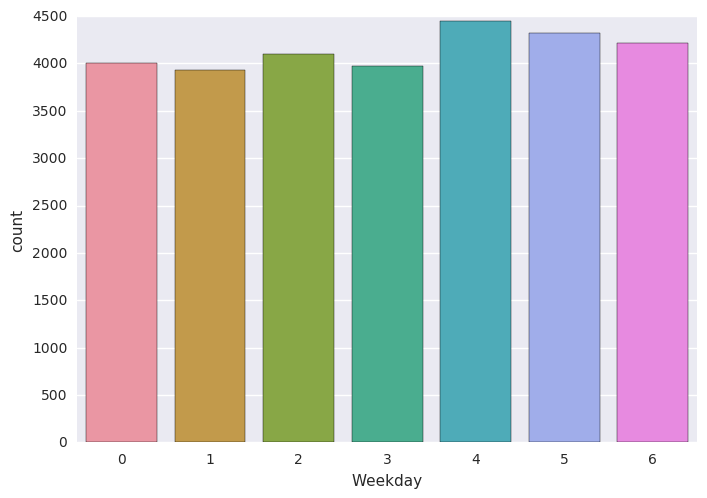

In [24]:
sns.countplot(data.Weekday)

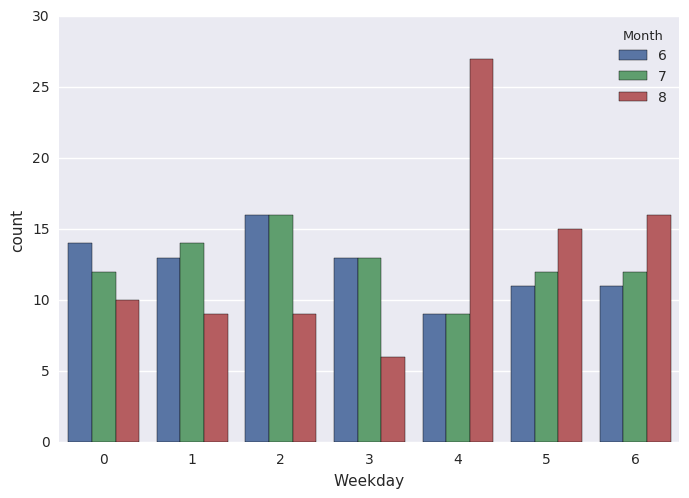

In [25]:
sns.countplot(x='Weekday', hue='Month', data=data[data.Description == 'MISSING JUVENILE'])

In [26]:
data

DateTime                     Category  \
IncidentId PdId                                                              
141017556  14101755671000 2014-06-01 00:01:00                 NON-CRIMINAL   
150091383  15009138327195 2014-06-01 00:01:00                     TRESPASS   
           15009138364070 2014-06-01 00:01:00               SUSPICIOUS OCC   
150099149  15009914906303 2014-06-01 00:01:00                LARCENY/THEFT   
140605461  14060546109027 2014-06-01 00:01:00               OTHER OFFENSES   
140626865  14062686506381 2014-06-01 00:01:00                LARCENY/THEFT   
           14062686506125 2014-06-01 00:01:00                LARCENY/THEFT   
140691733  14069173309029 2014-06-01 00:01:00               OTHER OFFENSES   
140457331  14045733109250 2014-06-01 00:01:00                        FRAUD   
140908839  14090883906313 2014-06-01 00:01:00                LARCENY/THEFT   
146106938  14610693806244 2014-06-01 00:01:00                LARCENY/THEFT   
140908839  14090883906303 2014-06-01 00:01:00                LARCENY/THEFT   
140779301  14077930119057 2014-06-01 00:01:00                      ASSAULT   
140763495  14076349571000 2014-06-01 00:01:00                 NON-CRIMINAL   
140801415  14080141515161 2014-06-01 00:01:00               OTHER OFFENSES   
146107033  14610703306374 2014-06-01 00:01:00                LARCENY/THEFT   
146108495  14610849506244 2014-06-01 00:01:00                LARCENY/THEFT   
141085064  14108506409029 2014-06-01 00:01:00               OTHER OFFENSES   
140456032  14045603227195 2014-06-01 00:10:00                     TRESPASS   
140636701  14063670109027 2014-06-01 00:10:00               OTHER OFFENSES   
140455705  14045570563010 2014-06-01 00:25:00                     WARRANTS   
           14045570562050 2014-06-01 00:25:00                     WARRANTS   
140455711  14045571106126 2014-06-01 00:28:00                LARCENY/THEFT   
           14045571106125 2014-06-01 00:28:00                LARCENY/THEFT   
146105554  14610555406372 2014-06-01 00:30:00                LARCENY/THEFT   
146105504  14610550406372 2014-06-01 00:30:00                LARCENY/THEFT   
146105065  14610506506244 2014-06-01 00:40:00                LARCENY/THEFT   
146105009  14610500971000 2014-06-01 00:54:00                 NON-CRIMINAL   
146114903  14611490306244 2014-06-01 01:00:00                LARCENY/THEFT   
146110064  14611006471000 2014-06-01 01:00:00                 NON-CRIMINAL   
...                                       ...                          ...   
140736624  14073662407021 2014-08-31 22:00:00                VEHICLE THEFT   
140734010  14073401004081 2014-08-31 22:01:00                      ASSAULT   
           14073401012080 2014-08-31 22:01:00                  WEAPON LAWS   
           14073401028010 2014-08-31 22:01:00               OTHER OFFENSES   
140734151  14073415168020 2014-08-31 22:10:00               OTHER OFFENSES   
146179355  14617935506224 2014-08-31 22:18:00                LARCENY/THEFT   
146178476  14617847606244 2014-08-31 22:30:00                LARCENY/THEFT   
140734822  14073482206241 2014-08-31 22:30:00                LARCENY/THEFT   
140734123  14073412319057 2014-08-31 22:35:00                      ASSAULT   
           14073412315200 2014-08-31 22:35:00              SECONDARY CODES   
140734098  14073409872000 2014-08-31 22:38:00                 NON-CRIMINAL   
           14073409864070 2014-08-31 22:38:00               SUSPICIOUS OCC   
140734214  14073421404014 2014-08-31 22:51:00                      ASSAULT   
           14073421427010 2014-08-31 22:51:00                        FRAUD   
140734145  14073414504134 2014-08-31 22:58:00                      ASSAULT   
140738147  14073814727175 2014-08-31 23:00:00               OTHER OFFENSES   
140734258  14073425827195 2014-08-31 23:00:00                     TRESPASS   
140738711  14073871107025 2014-08-31 23:00:00                VEHICLE THEFT   
140787570  14078757071000 2014-08-31 23:00:00              

In [27]:
pd_id_count = data.reset_index().groupby('IncidentId').PdId.count()
data.loc[data.index.map(lambda levels: pd_id_count.loc[levels[0]] > 1)]

DateTime                     Category  \
IncidentId PdId                                                              
150091383  15009138327195 2014-06-01 00:01:00                     TRESPASS   
           15009138364070 2014-06-01 00:01:00               SUSPICIOUS OCC   
140626865  14062686506381 2014-06-01 00:01:00                LARCENY/THEFT   
           14062686506125 2014-06-01 00:01:00                LARCENY/THEFT   
140908839  14090883906313 2014-06-01 00:01:00                LARCENY/THEFT   
           14090883906303 2014-06-01 00:01:00                LARCENY/THEFT   
140455705  14045570563010 2014-06-01 00:25:00                     WARRANTS   
           14045570562050 2014-06-01 00:25:00                     WARRANTS   
140455711  14045571106126 2014-06-01 00:28:00                LARCENY/THEFT   
           14045571106125 2014-06-01 00:28:00                LARCENY/THEFT   
140455727  14045572704134 2014-06-01 01:20:00                      ASSAULT   
           14045572764085 2014-06-01 01:20:00               SUSPICIOUS OCC   
140455749  14045574916010 2014-06-01 01:44:00                DRUG/NARCOTIC   
           14045574965055 2014-06-01 01:44:00               OTHER OFFENSES   
140857703  14085770328135 2014-06-01 02:00:00               OTHER OFFENSES   
           14085770315040 2014-06-01 02:00:00                      ASSAULT   
140457319  14045731909250 2014-06-01 02:00:00                        FRAUD   
           14045731906303 2014-06-01 02:00:00                LARCENY/THEFT   
146104738  14610473806372 2014-06-01 02:05:00                LARCENY/THEFT   
           14610473806244 2014-06-01 02:05:00                LARCENY/THEFT   
140455868  14045586865015 2014-06-01 03:20:00               OTHER OFFENSES   
           14045586819010 2014-06-01 03:20:00           DISORDERLY CONDUCT   
           14045586813075 2014-06-01 03:20:00                 PROSTITUTION   
140455880  14045588004011 2014-06-01 03:50:00                      ASSAULT   
           14045588003011 2014-06-01 03:50:00                      ROBBERY   
140493175  14049317515200 2014-06-01 08:00:00              SECONDARY CODES   
           14049317504013 2014-06-01 08:00:00                      ASSAULT   
140641998  14064199815201 2014-06-01 10:00:00                      ASSAULT   
140456377  14045637775000 2014-06-01 10:00:00               MISSING PERSON   
           14045637774000 2014-06-01 10:00:00               MISSING PERSON   
...                                       ...                          ...   
140733642  14073364262020 2014-08-31 18:51:00                     WARRANTS   
140733670  14073367027170 2014-08-31 19:17:00               OTHER OFFENSES   
           14073367019057 2014-08-31 19:17:00                      ASSAULT   
140733937  14073393704134 2014-08-31 19:40:00                      ASSAULT   
           14073393704013 2014-08-31 19:40:00                      ASSAULT   
140775688  14077568864070 2014-08-31 20:00:00               SUSPICIOUS OCC   
           14077568875030 2014-08-31 20:00:00                 NON-CRIMINAL   
140733987  14073398704104 2014-08-31 21:06:00                      ASSAULT   
           14073398764085 2014-08-31 21:06:00               SUSPICIOUS OCC   
140733909  14073390904013 2014-08-31 21:31:00                      ASSAULT   
           14073390904136 2014-08-31 21:31:00                      ASSAULT   
140733965  14073396519057 2014-08-31 21:40:00                      ASSAULT   
           14073396504134 2014-08-31 21:40:00                      ASSAULT   
140734082  14073408216110 2014-08-31 21:55:00                DRUG/NARCOTIC   
           14073408216652 2014-08-31 21:55:00                DRUG/NARCOTIC   
           14073408212080 2014-08-31 21:55:00                  WEAPON LAWS   
140734010  14073401004081 2014-08-31 22:01:00                      ASSAULT   
           14073401012080 2014-08-31 22:01:00                  WEAPON LAWS   
           14073401028010 2014-08-31 22:01:00              

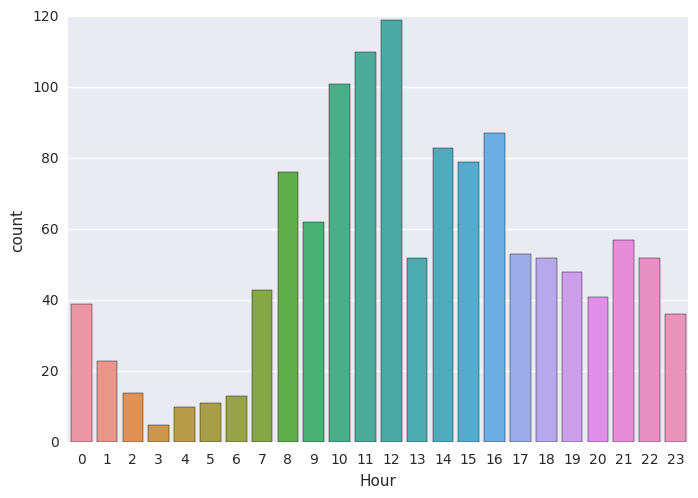

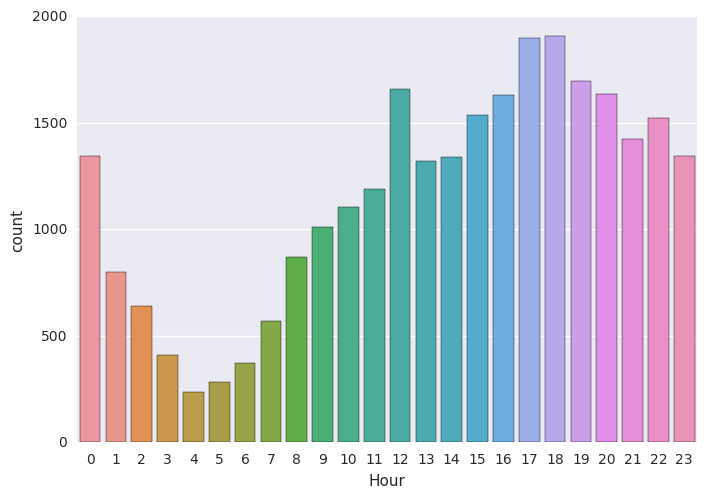

In [28]:
sns.countplot(x='Hour', data=data)
plt.figure()
sns.countplot(x='Hour', data=data[data.Category == 'MISSING PERSON'])
plt.figure();
sns.countplot(x='Hour', data=data[data.Category != 'MISSING PERSON'])

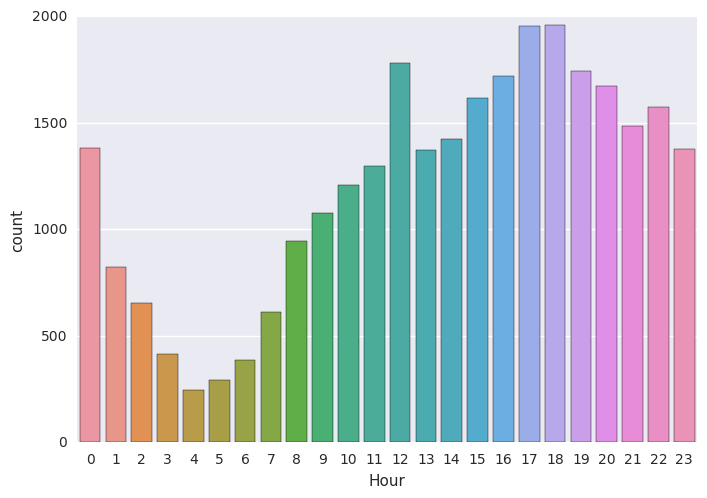

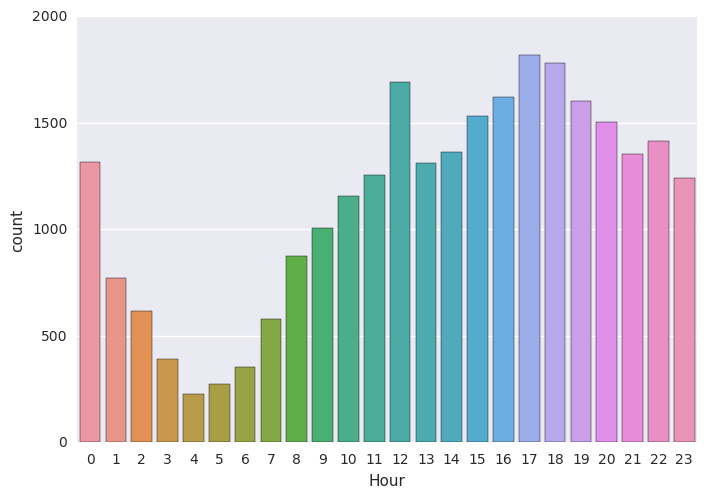

In [29]:
cat = 'VEHICLE THEFT'
sns.countplot(x='Hour', data=data)
plt.figure()
sns.countplot(x='Hour', data=data[data.Category == cat])
plt.figure()
sns.countplot(x='Hour', data=data[data.Category != cat])

In [30]:
data[data.Category == 'VEHICLE THEFT'].Description.value_counts()

STOLEN AUTOMOBILE               1350
STOLEN TRUCK                     350
STOLEN MOTORCYCLE                148
STOLEN AND RECOVERED VEHICLE     102
ATTEMPTED STOLEN VEHICLE          13
STOLEN MISCELLANEOUS VEHICLE       2
STOLEN BUS                         1
Name: Description, dtype: int64

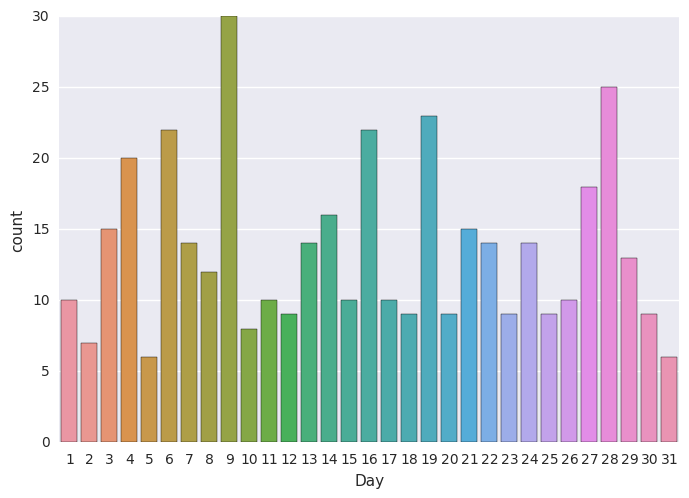

In [31]:
sns.countplot(x='Day', data=data[(data.Category == 'MISSING PERSON') & (data.Month == 7)])

In [32]:
data.groupby('Hour').count()

DateTime  Category  Description  Resolution   Lat   Lon  Address  \
Hour                                                                     
0         1381      1381         1381        1381  1381  1381     1381   
1          821       821          821         821   821   821      821   
2          654       654          654         654   654   654      654   
3          413       413          413         413   413   413      413   
4          245       245          245         245   245   245      245   
5          292       292          292         292   292   292      292   
6          386       386          386         386   386   386      386   
7          610       610          610         610   610   610      610   
8          944       944          944         944   944   944      944   
9         1074      1074         1074        1074  1074  1074     1074   
10        1206      1206         1206        1206  1206  1206     1206   
11        1298      1298         1298        1298  1298  1298     1298   
12        1779      1779         1779        1779  1779  1779     1779   
13        1372      1372         1372        1372  1372  1372     1372   
14        1424      1424         1424        1424  1424  1424     1424   
15        1614      1614         1614        1614  1614  1614     1614   
16        1718      1718         1718        1718  1718  1718     1718   
17        1952      1952         1952        1952  1952  1952     1952   
18        1959      1959         1959        1959  1959  1959     1959   
19        1744      1744         1744        1744  1744  1744     1744   
20        1674      1674         1674        1674  1674  1674     1674   
21        1482      1482         1482        1482  1482  1482     1482   
22        1573      1573         1573        1573  1573  1573     1573   
23        1378      1378         1378        1378  1378  1378     1378   

      PdDistrict  Month   Day  Weekday  
Hour                                    
0           1381   1381  1381     1381  
1            821    821   821      821  
2            654    654   654      654  
3            413    413   413      413  
4            245    245   245      245  
5            292    292   292      292  
6            386    386   386      386  
7            610    610   610      610  
8            944    944   944      944  
9           1074   1074  1074     1074  
10          1206   1206  1206     1206  
11          1298   1298  1298     1298  
12          1779   1779  1779     1779  
13          1372   1372  1372     1372  
14          1424   1424  1424     1424  
15          1614   1614  1614     1614  
16          1718   1718  1718     1718  
17          1952   1952  1952     1952  
18          1959   1959  1959     1959  
19          1744   1744  1744     1744  
20          1674   1674  1674     1674  
21          1482   1482  1482     1482  
22          1573   1573  1573     1573  
23          1378   1378  1378     1378

In [33]:
popular_descriptions = set(d for d, count in data.Description.value_counts().items() if count >= 100)
print(popular_descriptions)
data_popular = data[data.Description.map(lambda d: d in popular_descriptions)]
data_popular.head()

{'POSSESSION OF METH-AMPHETAMINE', 'SEARCH WARRANT SERVICE', 'FOUND PROPERTY', 'STOLEN TRUCK', 'LOST/STOLEN LICENSE PLATE', 'PETTY THEFT SHOPLIFTING', 'AIDED CASE -PROPERTY FOR DESTRUCTION', 'VIOLATION OF MUNICIPAL CODE', 'CONSPIRACY', 'PETTY THEFT BICYCLE', 'THREATS AGAINST LIFE', 'PETTY THEFT FROM UNLOCKED AUTO', 'TRAFFIC VIOLATION', 'GRAND THEFT FROM UNLOCKED AUTO', 'DOMESTIC VIOLENCE', 'AGGRAVATED ASSAULT WITH A KNIFE', 'UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE', 'GRAND THEFT OF PROPERTY', 'PROBATION VIOLATION', 'VIOLATION OF RESTRAINING ORDER', 'STOLEN AND RECOVERED VEHICLE', 'STOLEN AUTOMOBILE', 'PETTY THEFT FROM LOCKED AUTO', 'AGGRAVATED ASSAULT WITH BODILY FORCE', 'FALSE PERSONATION', 'WARRANT ARREST', 'POSSESSION OF NARCOTICS PARAPHERNALIA', 'FALSE IMPRISONMENT', 'PETTY THEFT OF PROPERTY', 'ENROUTE TO OUTSIDE JURISDICTION', 'INFLICT INJURY ON COHABITEE', 'AGGRAVATED ASSAULT WITH A DEADLY WEAPON', 'STOLEN MOTORCYCLE', 'GRAND THEFT FROM A BUILDING', 'GRAND THEFT PICKPOCKET',

DateTime        Category  \
IncidentId PdId                                                 
141017556  14101755671000 2014-06-01 00:01:00    NON-CRIMINAL   
150091383  15009138327195 2014-06-01 00:01:00        TRESPASS   
           15009138364070 2014-06-01 00:01:00  SUSPICIOUS OCC   
150099149  15009914906303 2014-06-01 00:01:00   LARCENY/THEFT   
140605461  14060546109027 2014-06-01 00:01:00  OTHER OFFENSES   

                                           Description Resolution        Lat  \
IncidentId PdId                                                                
141017556  14101755671000                LOST PROPERTY       NONE  37.783553   
150091383  15009138327195                  TRESPASSING       NONE  37.735578   
           15009138364070        SUSPICIOUS OCCURRENCE       NONE  37.735578   
150099149  15009914906303  PETTY THEFT FROM A BUILDING       NONE  37.719624   
140605461  14060546109027            FALSE PERSONATION       NONE  37.782951   

                                  Lon                      Address  \
IncidentId PdId                                                      
141017556  14101755671000 -122.417645       600 Block of LARKIN ST   
150091383  15009138327195 -122.452915  300 Block of CRESTAVISTA DR   
           15009138364070 -122.452915  300 Block of CRESTAVISTA DR   
150099149  15009914906303 -122.435324       500 Block of LISBON ST   
140605461  14060546109027 -122.413259         200 Block of TURK ST   

                           PdDistrict  Month  Day  Hour  Weekday  
IncidentId PdId                                                   
141017556  14101755671000    NORTHERN      6    1     0        6  
150091383  15009138327195   INGLESIDE      6    1     0        6  
           15009138364070   INGLESIDE      6    1     0        6  
150099149  15009914906303   INGLESIDE      6    1     0        6  
140605461  14060546109027  TENDERLOIN      6    1     0        6

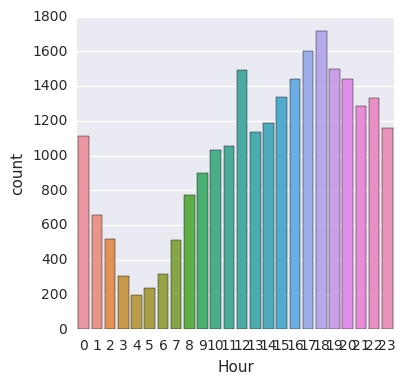

In [34]:
sns.factorplot(kind='count', x='Hour',
               data=data_popular.sort_values('Description'))

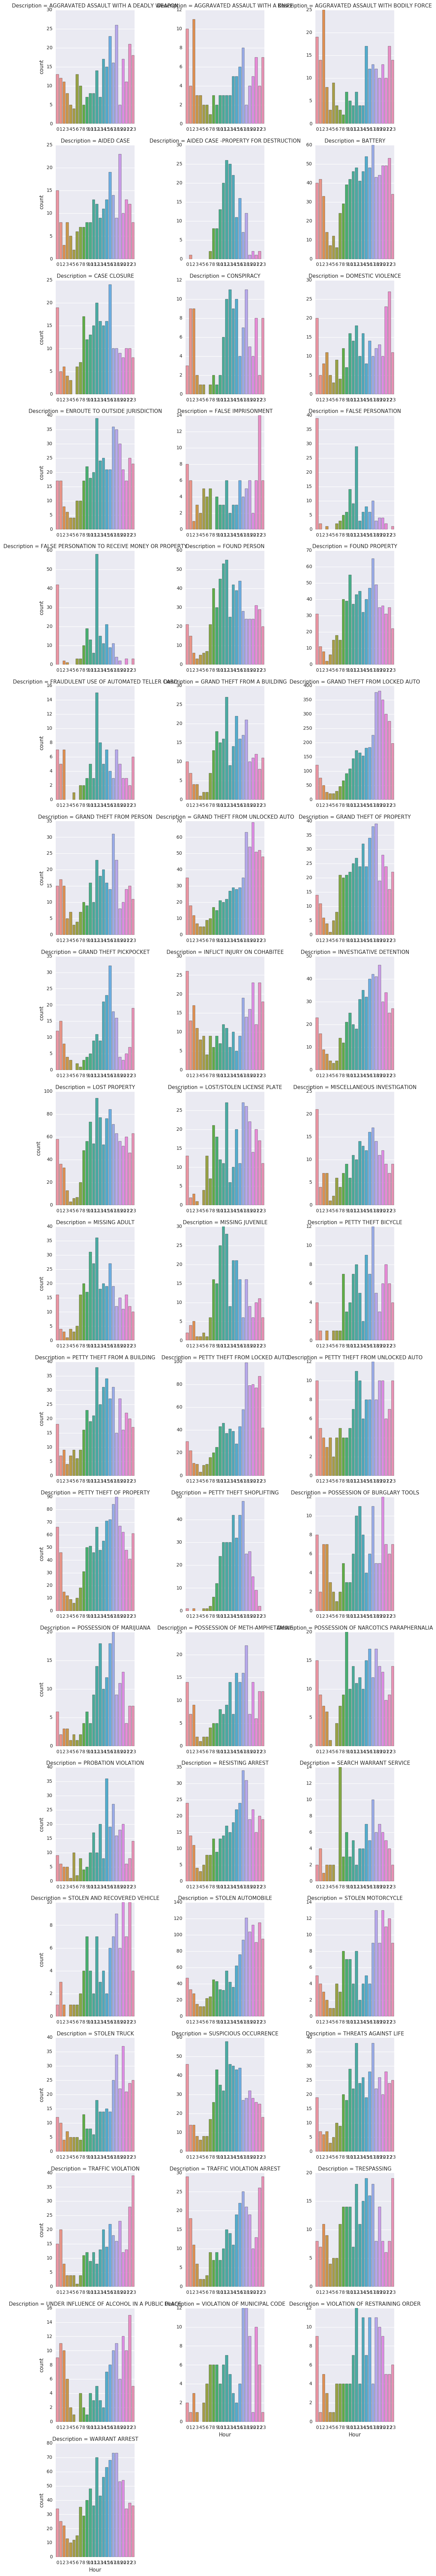

In [35]:
sns.factorplot(kind='count', x='Hour', col='Description', col_wrap=3, sharex=False, sharey=False,
               data=data_popular.sort_values('Description'))

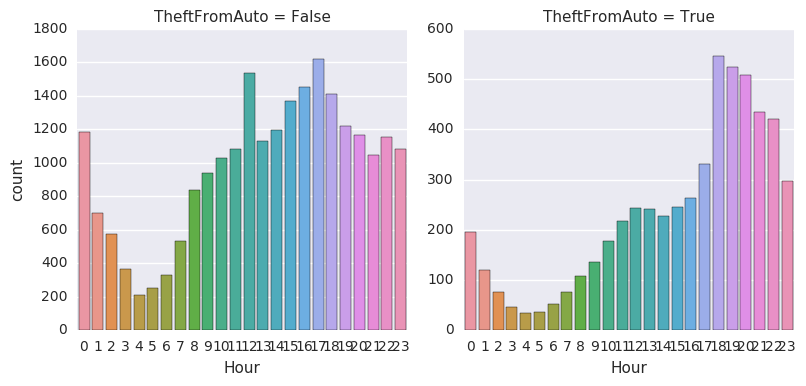

In [36]:
df = data.copy()
df['TheftFromAuto'] = data.Description.str.contains(r'THEFT FROM\b.*\bAUTO', regex=True)
sns.factorplot(kind='count', x='Hour', col='TheftFromAuto', sharey=False, data=df)

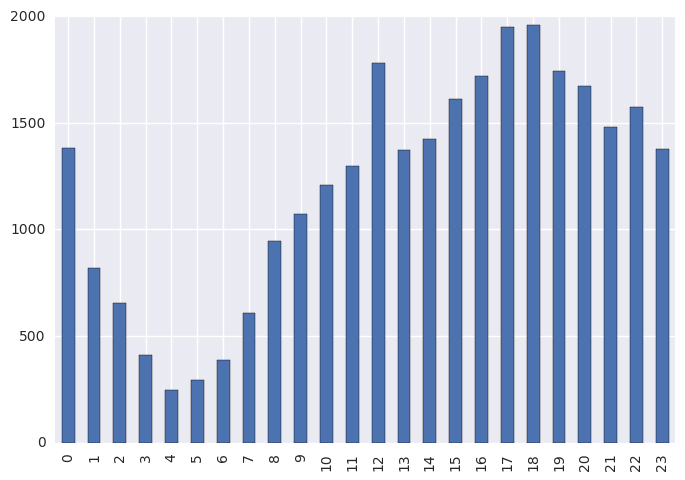

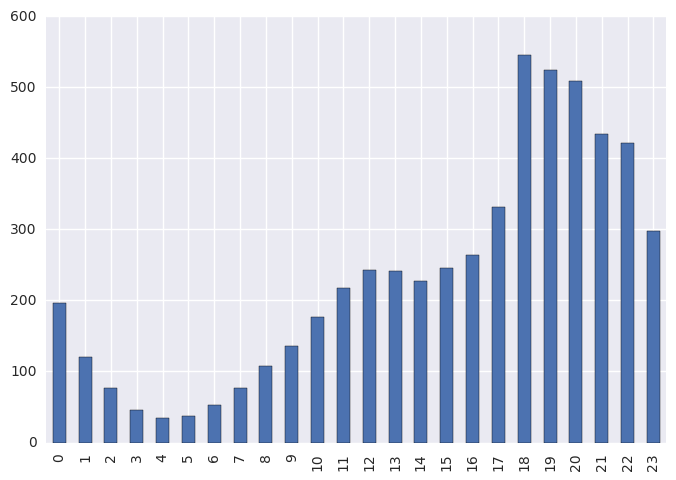

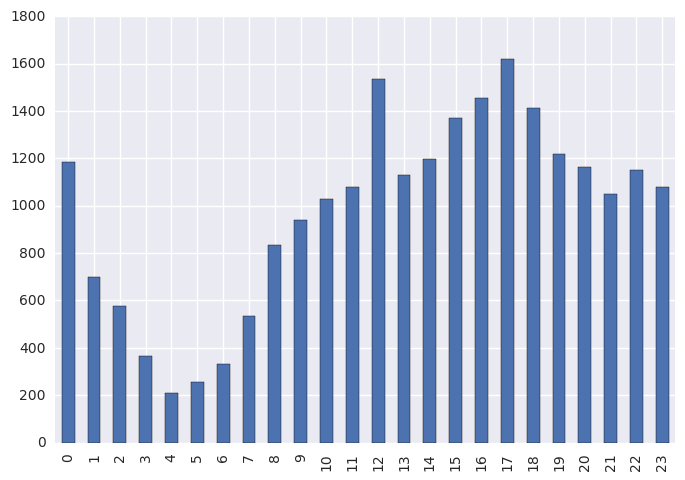

In [37]:
df.Hour.value_counts().sort_index().plot.bar()
plt.figure()
df[df.TheftFromAuto].Hour.value_counts().sort_index().plot.bar()
plt.figure()
df[~df.TheftFromAuto].Hour.value_counts().sort_index().plot.bar()

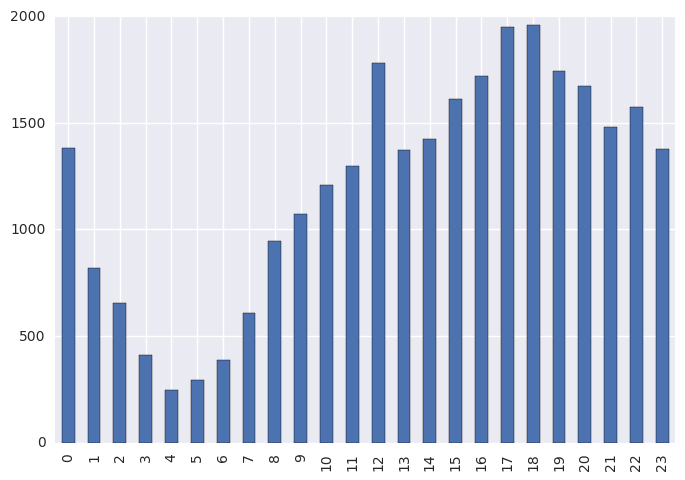

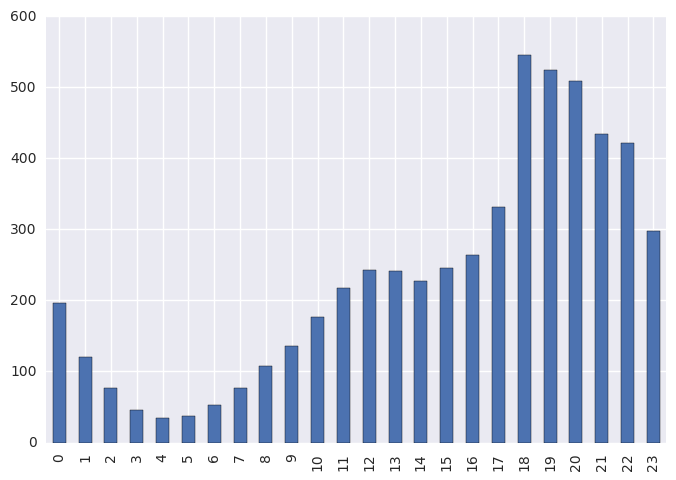

In [38]:
all_counts = df.Hour.value_counts().sort_index()
theft_from_auto_counts = df[df.TheftFromAuto].Hour.value_counts().sort_index()

all_counts.plot.bar()
plt.figure()
theft_from_auto_counts.plot.bar()

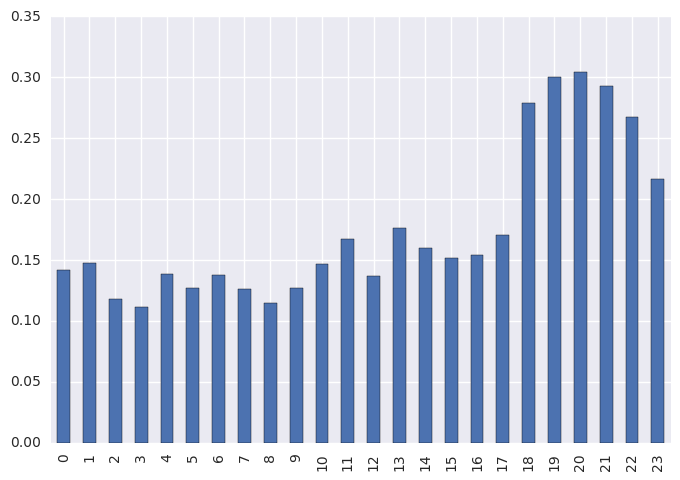

In [39]:
(theft_from_auto_counts / all_counts).plot.bar()

In [156]:
f = theft_from_auto_counts / all_counts
f[f > 0.20]

18    0.278714
19    0.300459
20    0.304062
21    0.292848
22    0.267641
23    0.216255
Name: Hour, dtype: float64

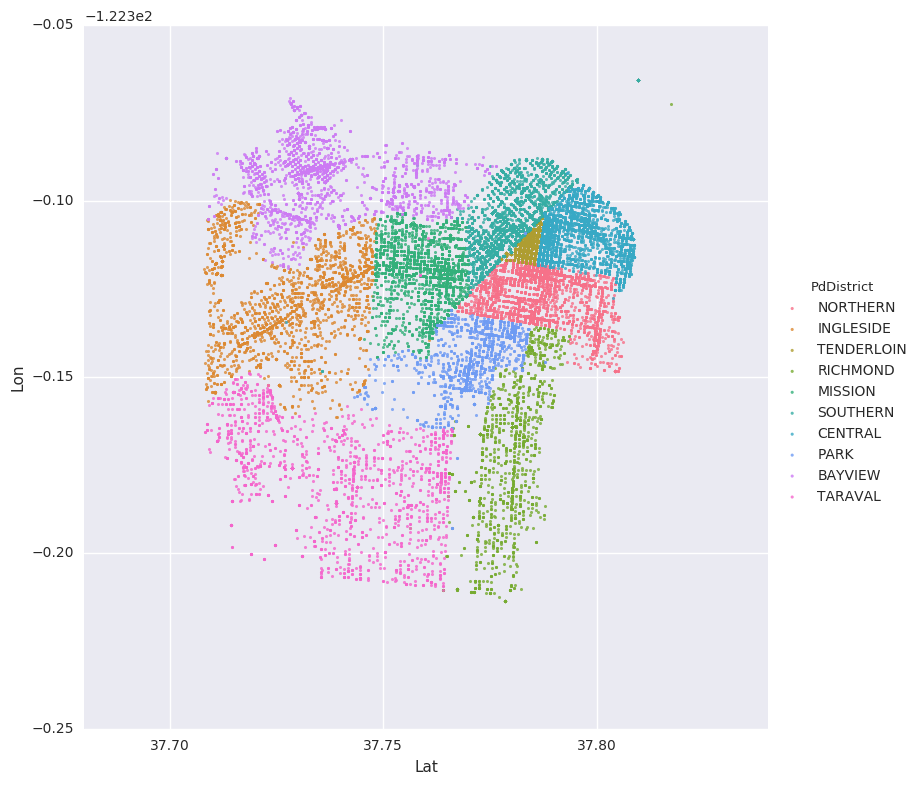

In [40]:
sns.lmplot(x='Lat', y='Lon', hue='PdDistrict', data=df, fit_reg=False, size=8, markers='.')

In [139]:
district_hour_p = (df[df.TheftFromAuto].groupby('Hour').PdDistrict.value_counts() / df[~df.TheftFromAuto].groupby('Hour').PdDistrict.value_counts()).rename('P').swaplevel().sort_index().reset_index()
district_hour_p.head()

PdDistrict  Hour         P
0    BAYVIEW     0  0.082192
1    BAYVIEW     1  0.180000
2    BAYVIEW     2  0.066667
3    BAYVIEW     3  0.031250
4    BAYVIEW     4  0.058824

TypeError: 'AxesSubplot' object does not support indexing

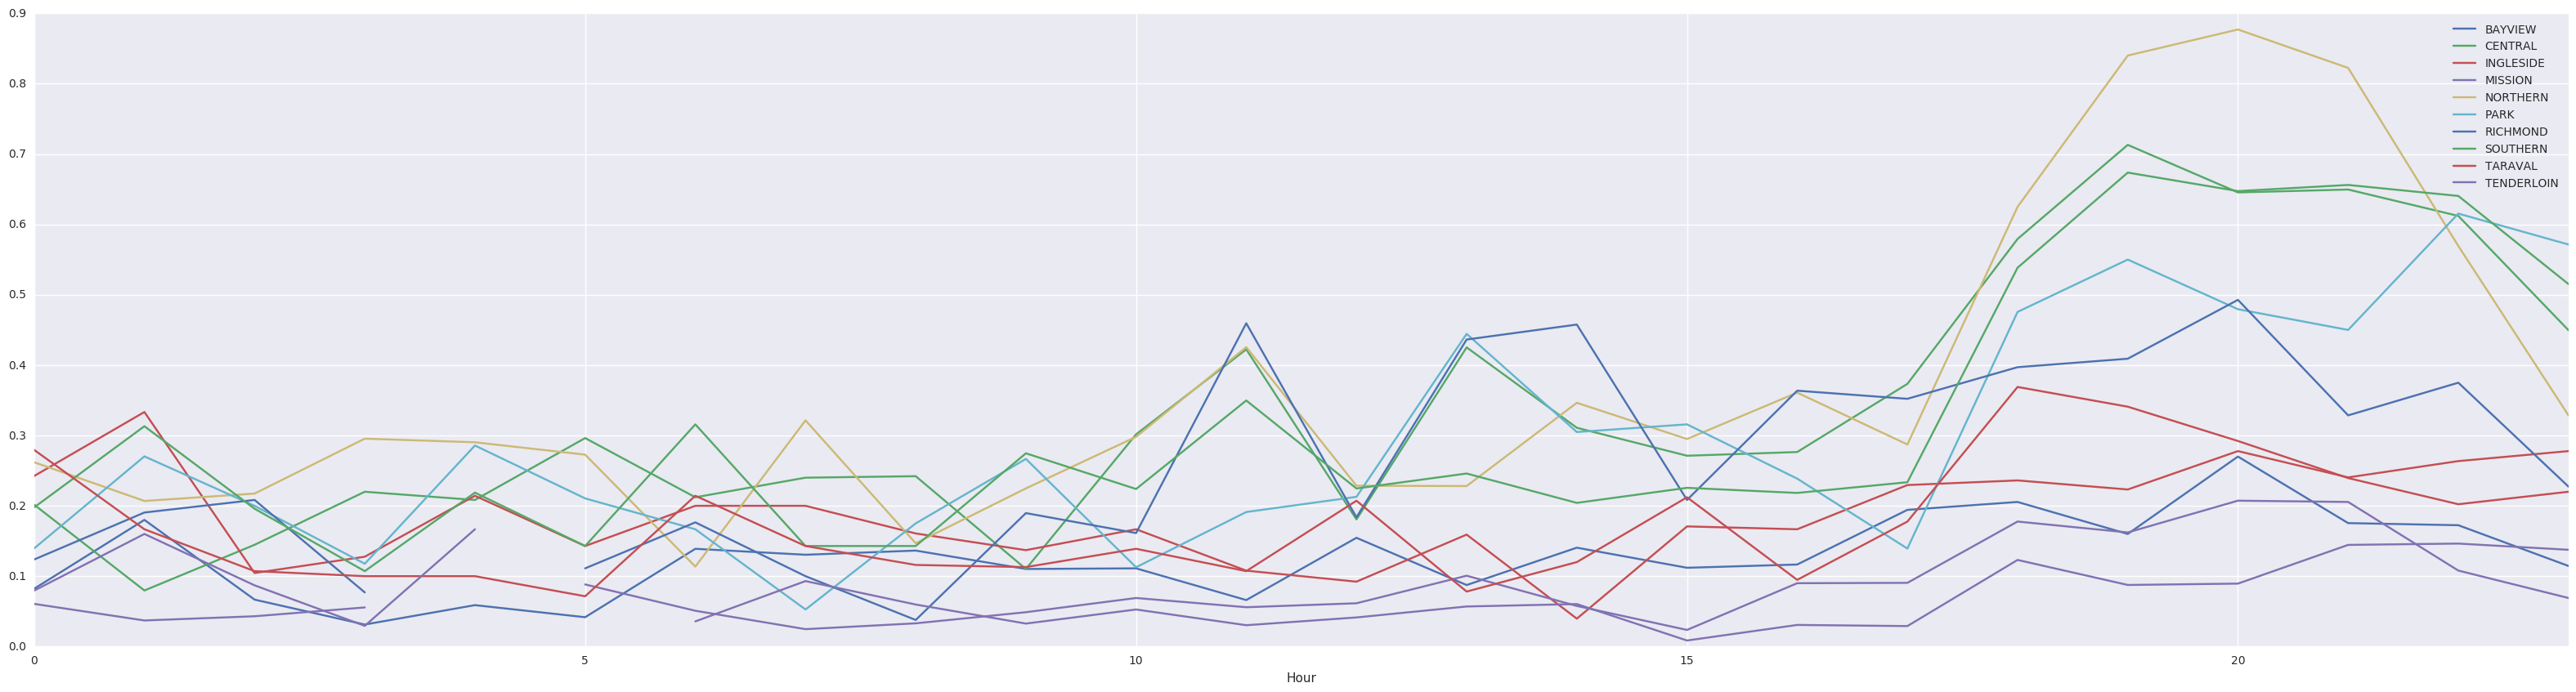

In [182]:
import matplotlib.ticker as plticker

num_districts = len(district_hour_p.PdDistrict.unique())
fig, ax = plt.subplots(1, 1, figsize=(40, 10), sharex=True, sharey=True)
for i, (label, group) in enumerate(district_hour_p.groupby('PdDistrict')):
    group.plot.line(x='Hour', y='P', label=label, ax=ax) #, ax=ax[i])
ax[0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
plt.tight_layout()

In [ ]:
hot

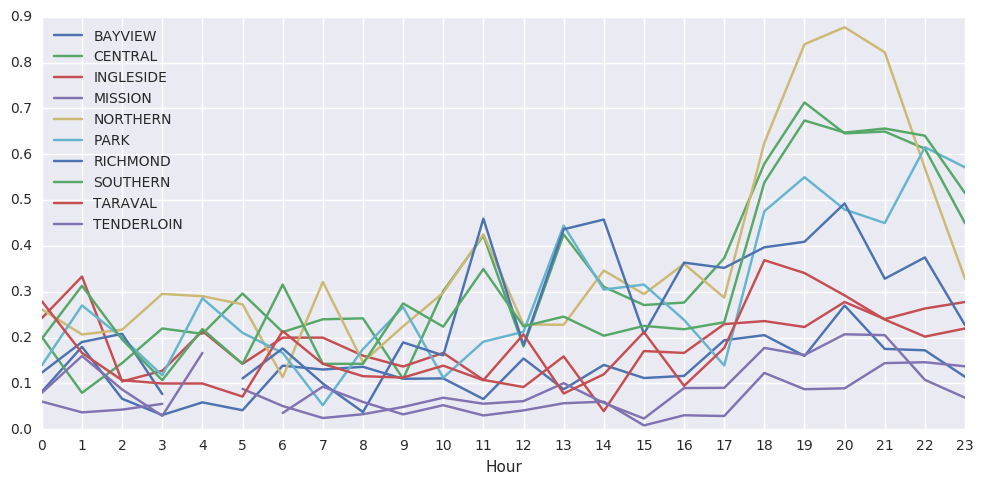

In [188]:
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=(10, 5))
for label, group in district_hour_p.groupby('PdDistrict'):
    group.plot.line(x='Hour', y='P', label=label, ax=ax)
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
plt.tight_layout()

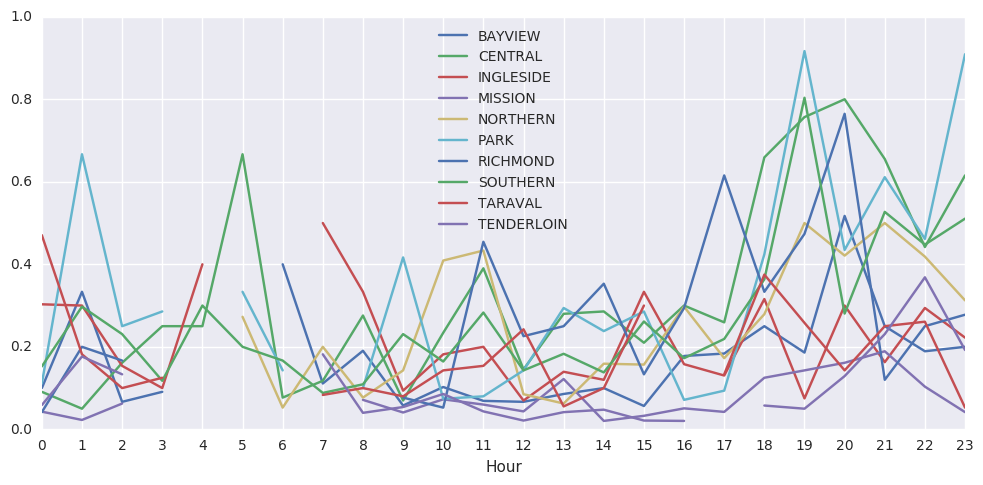

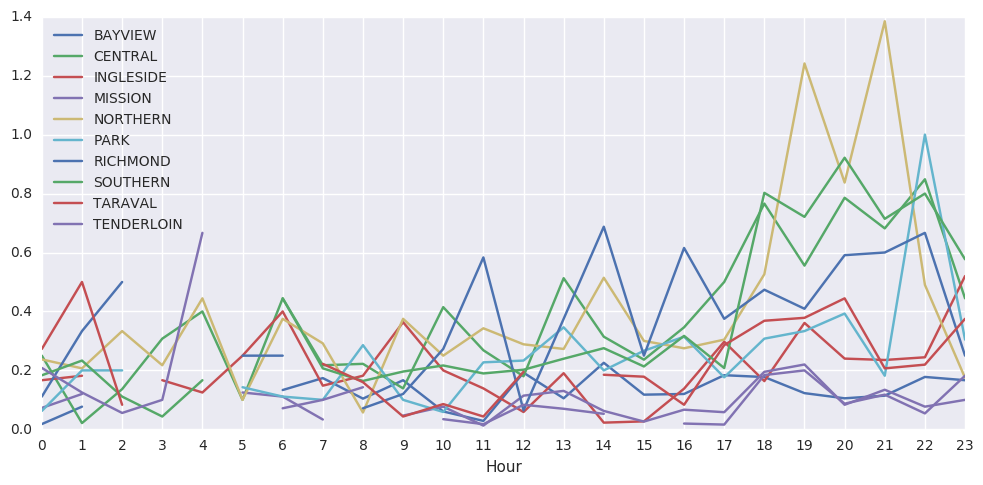

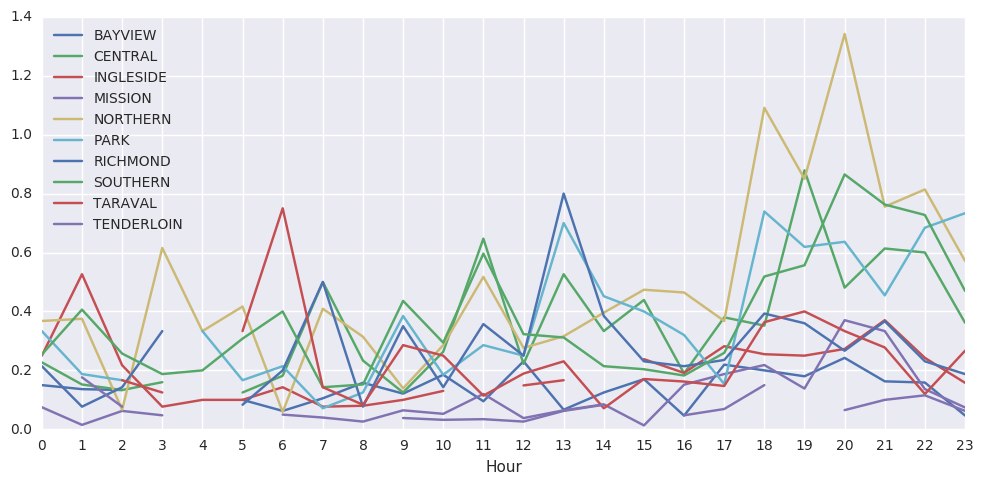

In [190]:
import matplotlib.ticker as plticker

for month in [6, 7, 8]:
    dhp = (df[df.TheftFromAuto & (df.Month == month)].groupby('Hour').PdDistrict.value_counts() / df[~df.TheftFromAuto & (df.Month == month)].groupby('Hour').PdDistrict.value_counts()).rename('P').swaplevel().sort_index().reset_index()
    fig, ax = plt.subplots(figsize=(10, 5))
    for label, group in dhp.groupby('PdDistrict'):
        group.plot.line(x='Hour', y='P', label=label, ax=ax)
    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
    plt.tight_layout()

In [142]:
theft_from_auto_p = (df[df.TheftFromAuto].PdDistrict.value_counts() / df.PdDistrict.value_counts()).sort_values(ascending=False)
theft_from_auto_p

NORTHERN      0.280301
CENTRAL       0.261600
SOUTHERN      0.254051
PARK          0.233904
RICHMOND      0.217982
TARAVAL       0.161900
INGLESIDE     0.159798
BAYVIEW       0.121101
MISSION       0.079730
TENDERLOIN    0.063802
Name: PdDistrict, dtype: float64

In [143]:
df['HotPdDistrict'] = df.PdDistrict.map(lambda d: theft_from_auto_p[d] > 0.20)

In [157]:
df['HotHour'] = (18 <= df.Hour) & (df.Hour <= 23)

In [161]:
num_thefts_from_auto = df.TheftFromAuto.sum()
num_thefts_from_auto_during_hot_hours = (df.TheftFromAuto & df.HotHour).sum()
num_thefts_from_auto, num_thefts_from_auto_during_hot_hours / num_thefts_from_auto

(5565, 0.49092542677448336)

In [162]:
num_thefts_from_auto = df.TheftFromAuto.sum()
num_thefts_from_auto_during_hot_hours_hot_district = (df.TheftFromAuto & df.HotHour & df.HotPdDistrict).sum()
num_thefts_from_auto, num_thefts_from_auto_during_hot_hours_hot_district / num_thefts_from_auto

(5565, 0.36909254267744834)

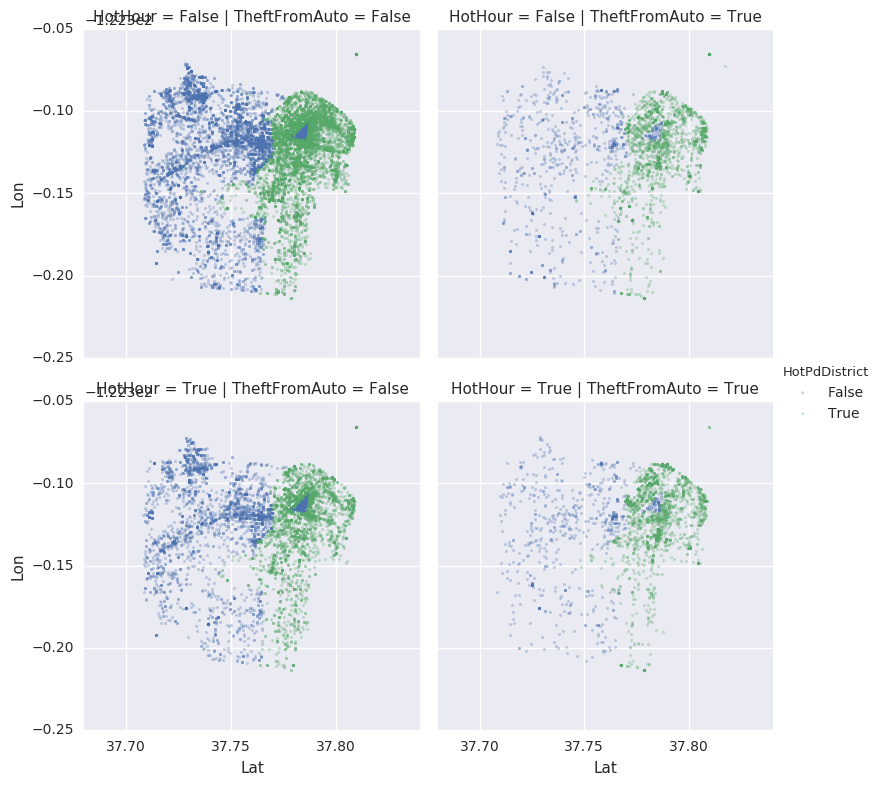

In [158]:
sns.lmplot(x='Lat', y='Lon', hue='HotPdDistrict', row='HotHour', col='TheftFromAuto', data=df, fit_reg=False,
           size=4, markers='.', scatter_kws={'alpha': 0.3})

In [141]:
sns.lmplot(x='Lat', y='Lon', hue='HotPdDistrict', col='TheftFromAuto', data=df[df.PdDistrict == 'TENDERLOIN'], fit_reg=False,
           size=4, markers='.', scatter_kws={'alpha': 0.3})

/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


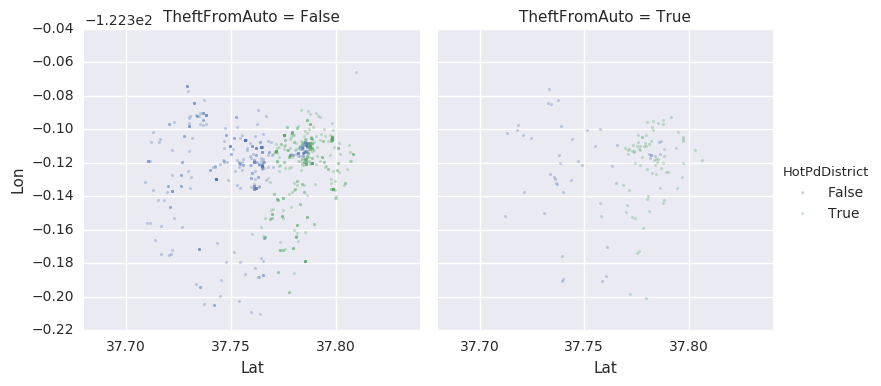

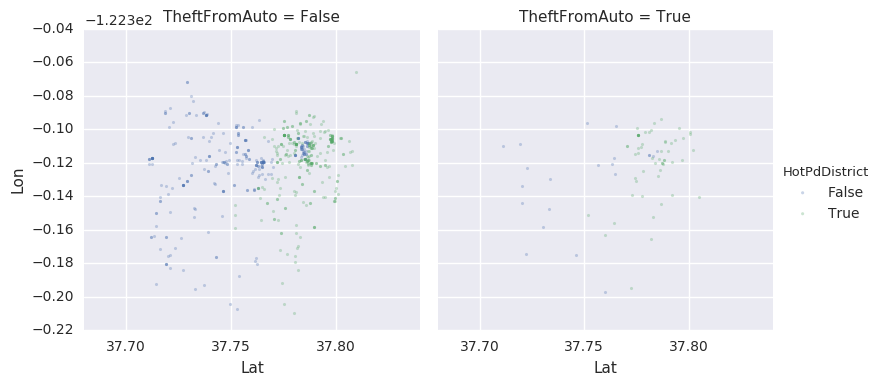

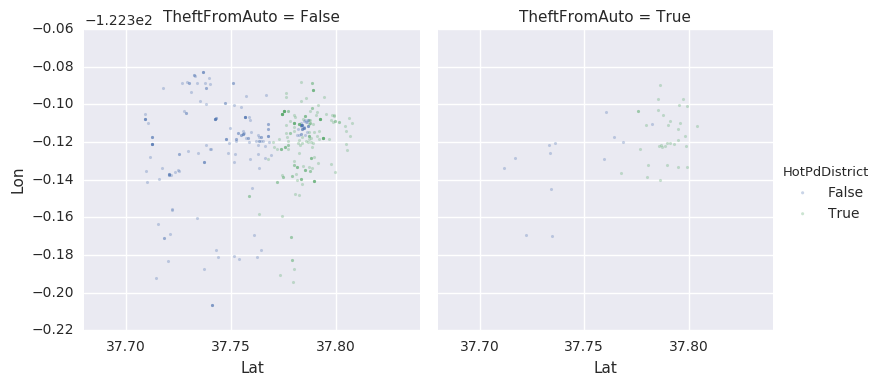

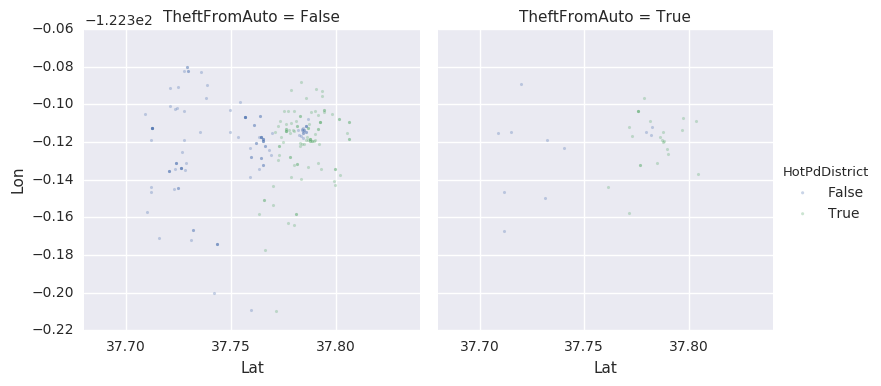

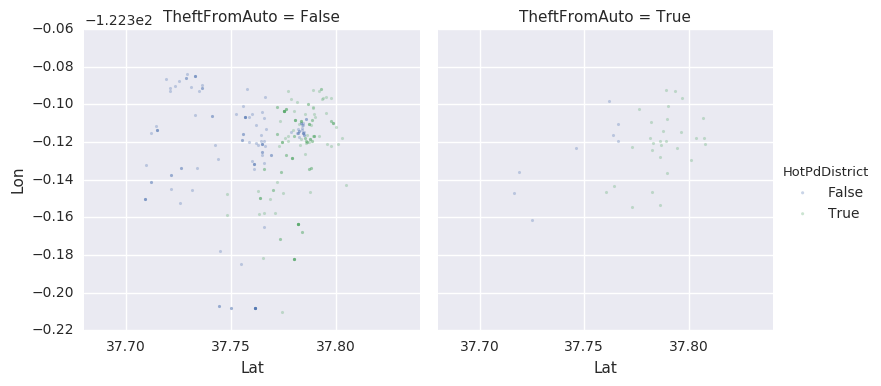

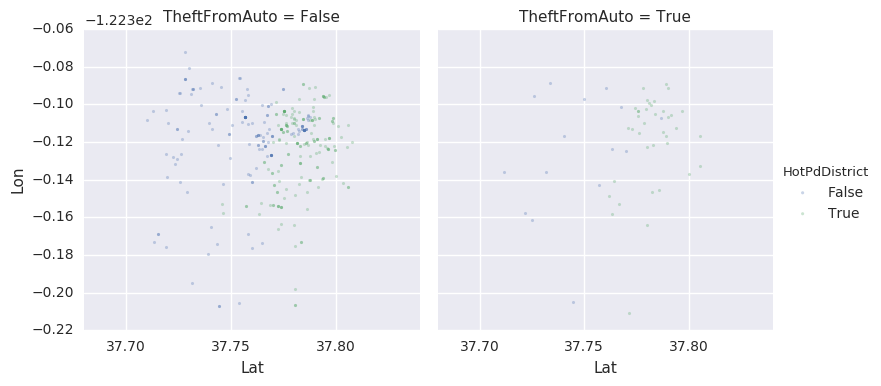

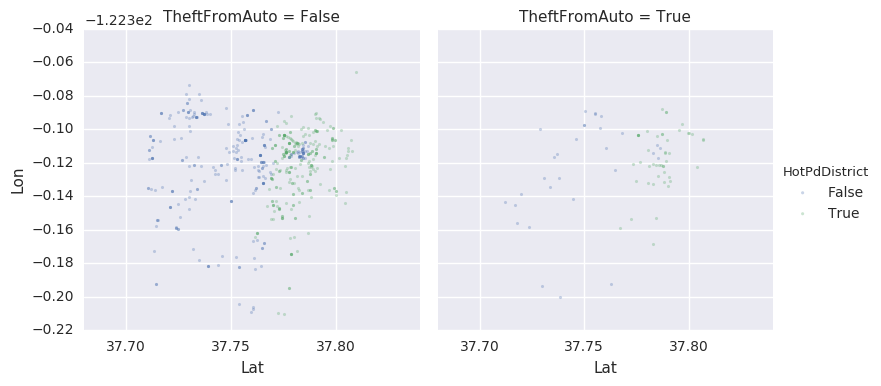

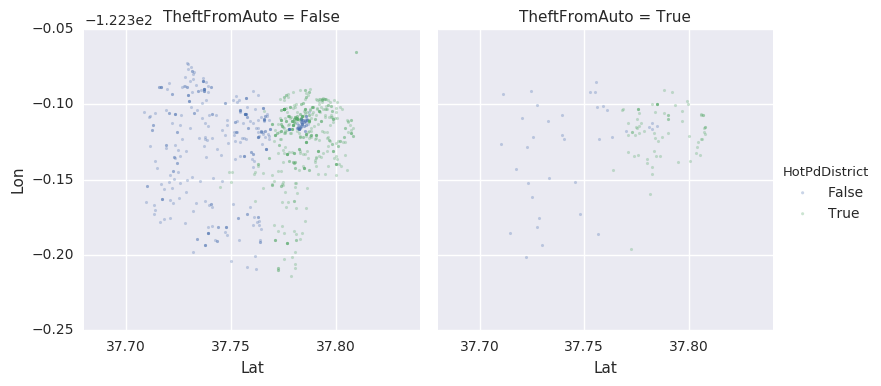

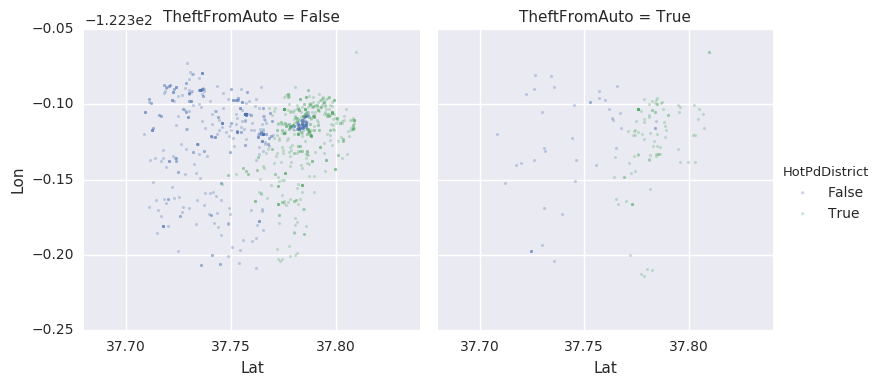

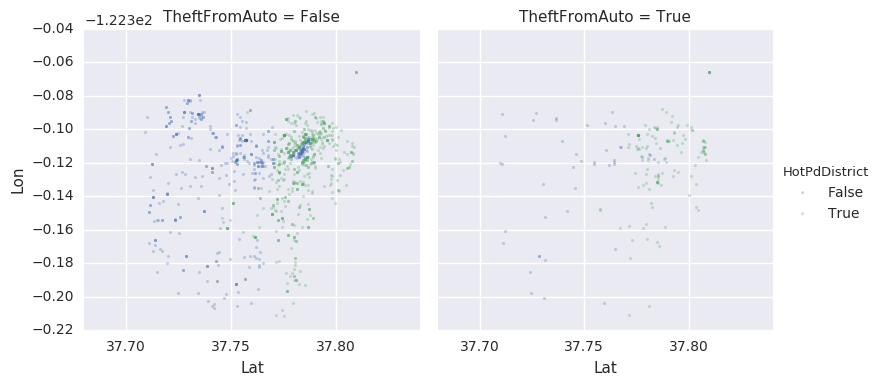

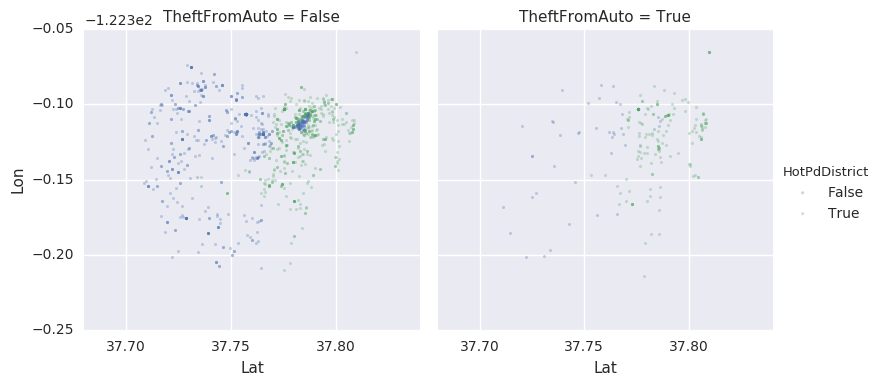

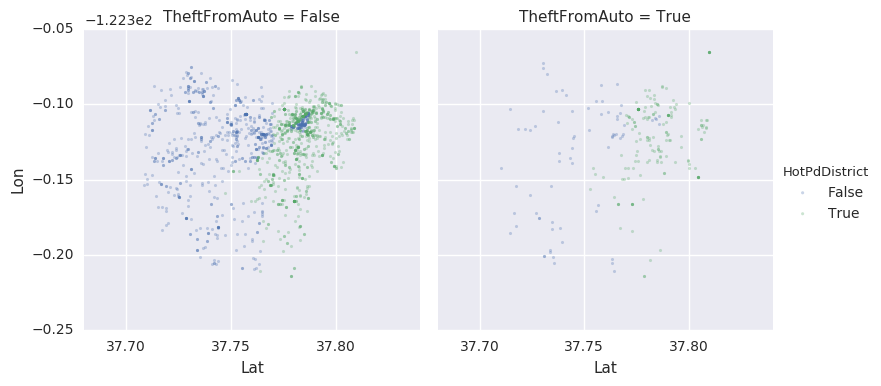

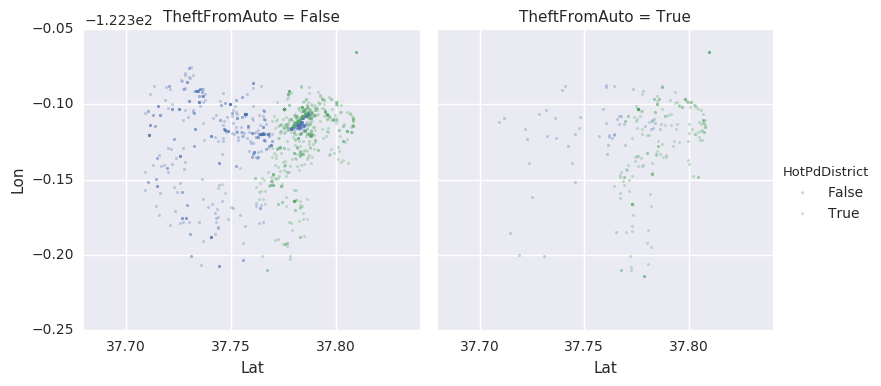

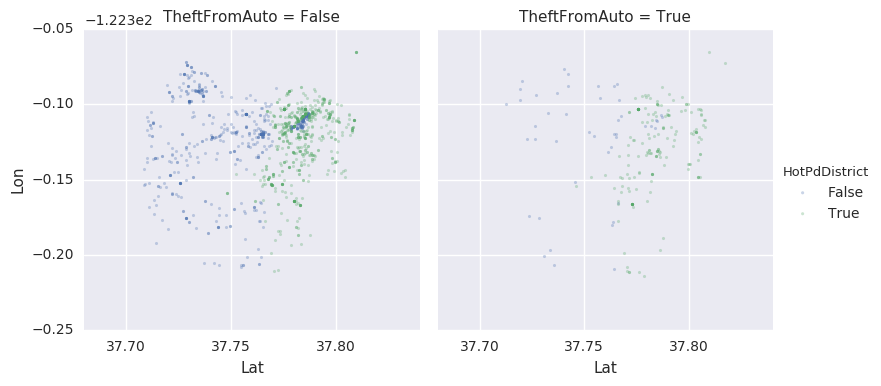

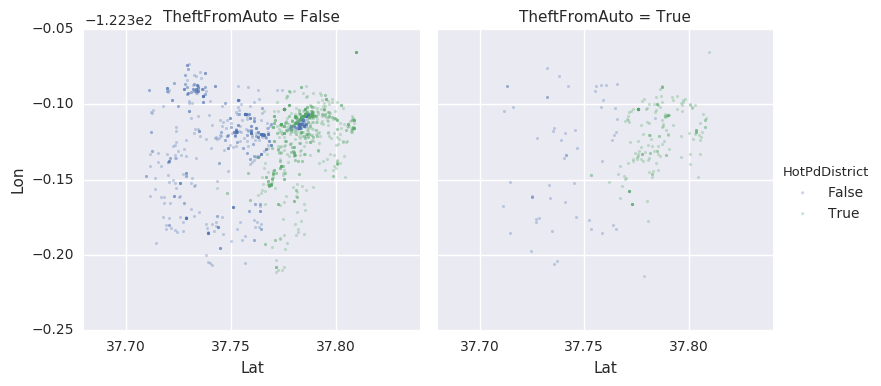

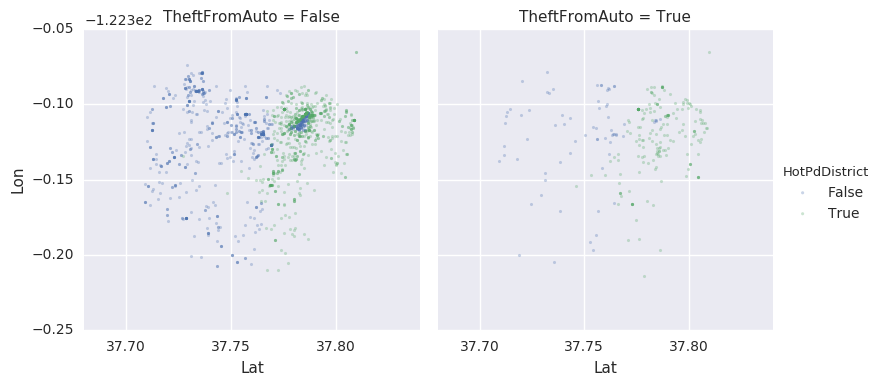

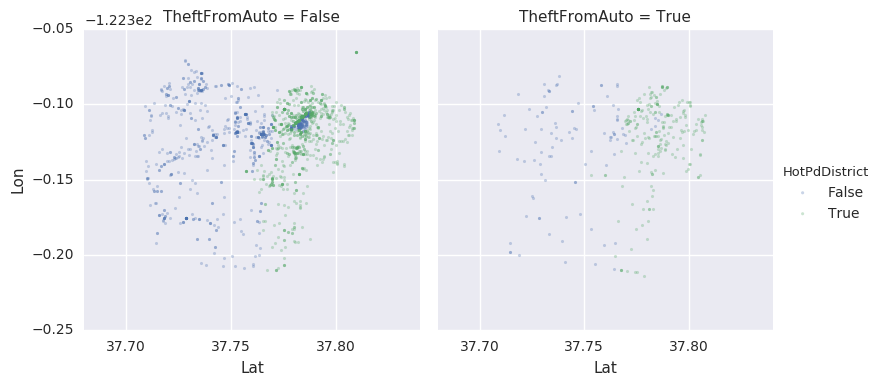

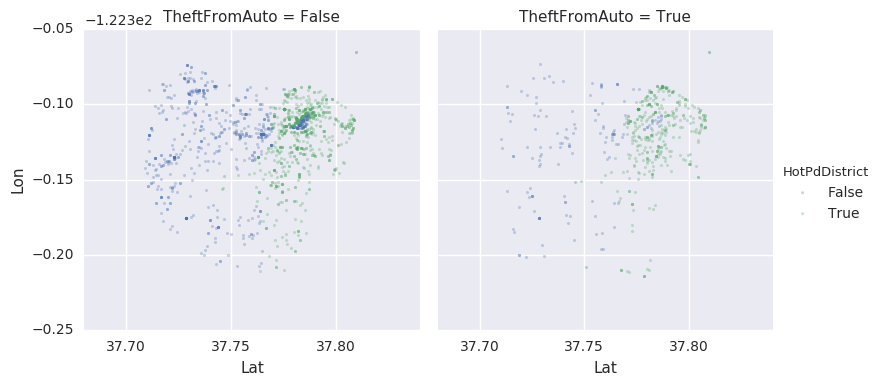

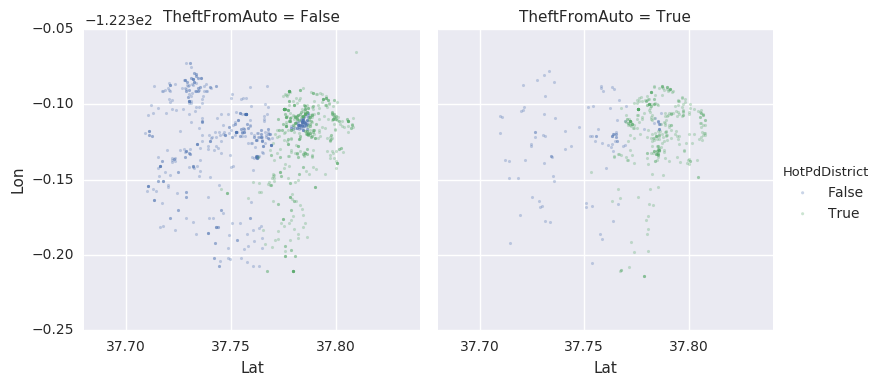

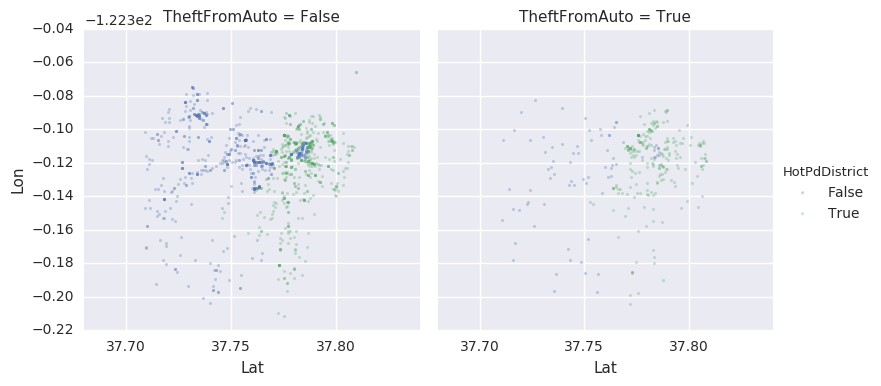

In [58]:
for hour in range(24):
    sns.lmplot(x='Lat', y='Lon', hue='HotPdDistrict', col='TheftFromAuto', data=df[df.Hour == hour], fit_reg=False,
               size=4, markers='.', scatter_kws={'alpha': 0.3})

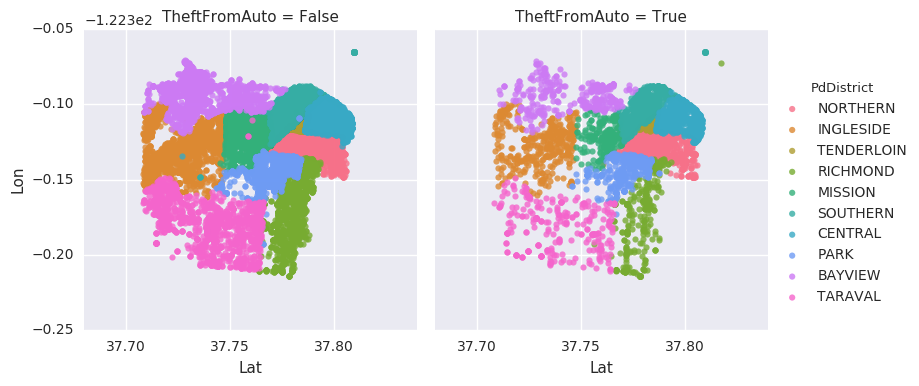

In [44]:
sns.lmplot(x='Lat', y='Lon', hue='PdDistrict', col='TheftFromAuto', data=df, fit_reg=False,
           size=4, markers='o')

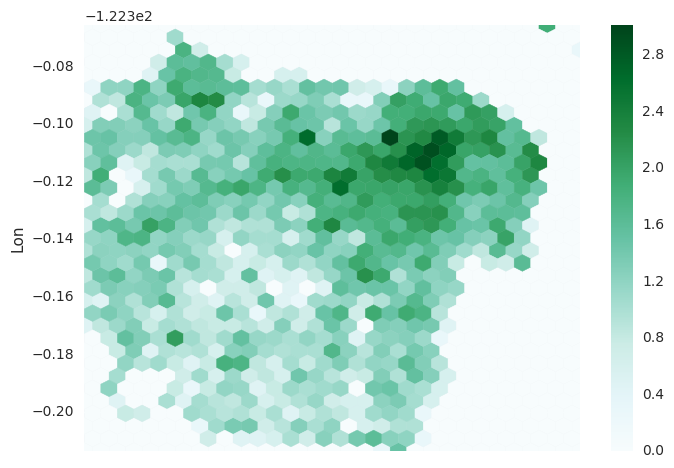

In [45]:
data.plot.hexbin(x='Lat', y='Lon', gridsize=30, bins='log')

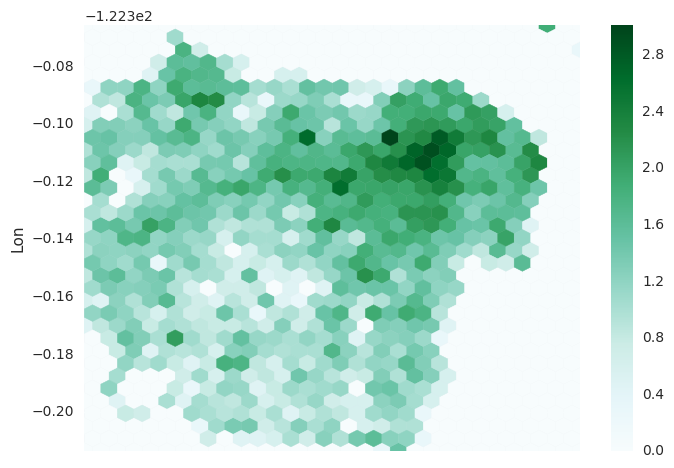

In [46]:
df.plot.hexbin(x='Lat', y='Lon', gridsize=30, bins='log')

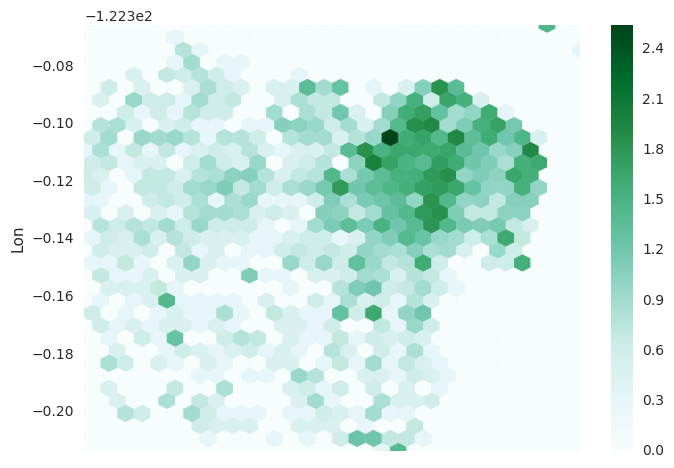

In [47]:
df[df.TheftFromAuto].plot.hexbin(x='Lat', y='Lon', gridsize=30, bins='log')

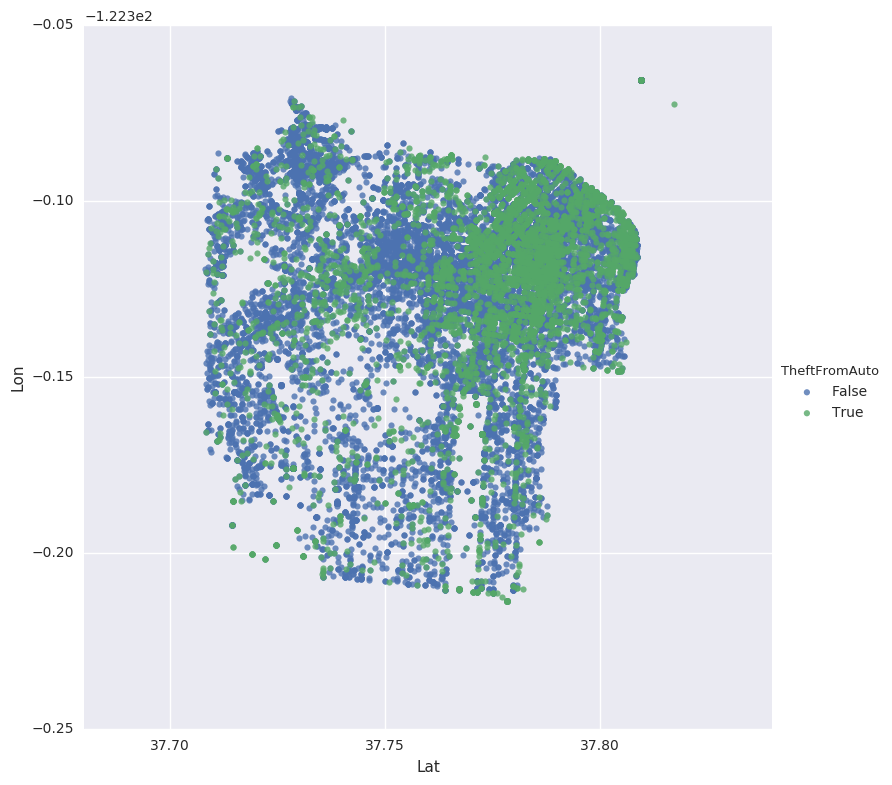

In [48]:
sns.lmplot(x='Lat', y='Lon', hue='TheftFromAuto', data=df, fit_reg=False, size=8)

In [ ]:
num_crimes_by_district_and_hour = data.groupby('Hour').PdDistrict.value_counts().rename('NumCrimes')
num_tfvs_by_district_and_hour = data[data.IsTfv].groupby('Hour').PdDistrict.value_counts().rename('NumTfvs')
df = pd.concat([
        num_crimes_by_district_and_hour.to_frame(),
        num_tfvs_by_district_and_hour.to_frame()
    ], axis=1)
df.NumTfvs = df.NumTfvs.fillna(0).astype(int)
df['TfvRate'] = df.NumTfvs / df.NumCrimes
df = df.swaplevel().sort_index().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)
for district, group in df.groupby('PdDistrict'):
    ax = axes[1 if district in high_tfv_pd_districts else 0]
    group.plot.line(x='Hour', y='TfvRate', label=district, ax=ax)
for ax in axes:
    ax.legend(title='Police Department District', loc='upper left')
    ax.xaxis.set_major_locator(MultipleLocator(base=1))
axes[0].set_title('Ratio of thefts from vehicles to all crimes')
axes[1].set_title('Ratio of thefts from vehicles to all crimes')
plt.tight_layout()
plt.show()